In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_profiling import ProfileReport
import os
import math

TWORZENIE KATALOGÓW DO DANYCH I WYKRESÓW

In [2]:
proj_dir = os.path.join(os.getcwd())
data_dir = os.path.join(proj_dir, "data")
plot_dir = os.path.join(proj_dir, "plot")
os.makedirs(data_dir, exist_ok = True)
os.makedirs(plot_dir, exist_ok = True)

In [3]:
print ('\nPrzetwarzamy katalog', data_dir)
data = os.listdir (data_dir)
print(data)


Przetwarzamy katalog C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data
['Ada_1A_007.txt', 'Ada_2B_006.txt', 'Agn_1A_005.txt', 'Ali_2B_016.txt', 'And_1A_017.txt', 'And_2B_020.txt', 'Ann_2B_005.txt', 'Art_2B_011.txt', 'Boz_2A_007.txt', 'Dor_2A_015.txt', 'Dor_2B_008.txt', 'Elz_1A_009.txt', 'Ewa_1B_003.txt', 'Gra_1A_024.txt', 'Gra_2B_021.txt', 'Hel_1A_015.txt', 'Hen_2A_017.txt', 'Ire_2A_001.txt', 'Ire_2C_001.txt', 'Iwo_1A_020.txt', 'Iza_2B_013.txt', 'Jac_1A_004.txt', 'Jac_2C_003.txt', 'Jak_1B_001.txt', 'Jan_1A_006.txt', 'Jan_1A_025.txt', 'Jan_2A_013.txt', 'Jan_2B_003.txt', 'Jar_1A_011.txt', 'Jer_ 1A_027.txt', 'Jer_1A_014.txt', 'Jer_2A_010.txt', 'Jer_2B_010.txt', 'Joa_1A_012.txt', 'Jol_1A_008.txt', 'Jol_1A_023.txt', 'Jul_1B_002.txt', 'Jul_2C_002.txt', 'Kaz_2A_022.txt', 'Kry_2B_019.txt', 'Krz_2A_012.txt', 'Lui_2A_020.txt', 'Luk_1A_010.txt', 'Luk_2A_002.txt', 'Mar_1A_002.txt', 'Mar_2A_005.txt', 'Mar_2A_019.txt', 'Mar_2B_018.txt', 'Mic_2A_003.txt', 'Mic_2B_001.txt', 'Nor_2B_012.txt', '

TWORZENIE KATALOGU WYKRESÓW DLA KAŻDEGO PACJENTA

In [4]:
for i in data:
    os.makedirs(os.path.join(plot_dir, i) , exist_ok = True)

Po sprawdzeniu wszystkich plików z danymi okazuje się, że jest problem z:
Iwo_1A_020.txt, Jan_1A_025.txt, Jer_ 1A_027.txt, Jer_1A_014.txt, Joa_1A_012.txt, Jol_1A_023.txt, Paw_1A_013.txt, Rom_1A_030.txt, Zbi_2A_016.txt

Niektóre osoby mają robionych kilka pomiarów, można więc zostawić jeden najdłużysz pomiar, tak aby pozostawić jak najwięcej danych.

Po wczytaniu skróconych danych wszytkie zmienne są typu str(), konwersja na float() - tak aby móc wykonywać operacje na danych - dla tak dużej ilości danych jest zbyt czasochłonna. Problem rozwiązuje modyfikacja pliku - usunięcie odpowiednich wierszy z danymi i pozostawienie tylko tych, które odnoszą się do najdłuższego pomiaru, który jest zapisany jako ostatni.

Plik, Pierwszy wiersz ostatniego badania
Iwo_1A_020.txt, 207715:
Jan_1A_025.txt, 7005:
Jer_ 1A_027.txt, 7005:
Jer_1A_014.txt, 47215:
Joa_1A_012.txt, 71270:
Jol_1A_023.txt, 7005:
Paw_1A_013.txt, 48010:
Rom_1A_030.txt, 12060:
Zbi_2A_016.txt, 223655:

Plik Jer_ 1A_027.txt jako jedyny ma inne kodowanie - ANSI.

FUNKCJA TWORZĄCA DATAFRAME Z PLIKU

Zmienna black_list zawiera nazwy wyżej wymienionych 'wadliwych' plików.
Zmienna black_list_values zawiera informację o lini, w której zaczyna się ostatnie najdłuższe badanie

Pliki te są trwale zmodyfikowane poprzez usunięcie niepotrzebnych wierszy z danymi.

'with open(csv_path, 'r', encoding='unicode_escape') as fp:' - dzięki argumentowi encoding='unicode_escape' rozwiązujemy problem z innym kodowaniem pliku Jer_ 1A_027.txt

'with open(csv_path, 'w', encoding='utf_8') as fp:' - w tym przypadku zapisujemy pliki w tym samym kodowaniu - utf-8

In [5]:
def load_serie(path , file, columns = ['time','R_peak','Resp','SBP','cus']):
    csv_path = os.path.join(path, file)
    print(path, file)
    
    black_list = ['Iwo_1A_020.txt','Jan_1A_025.txt','Jer_ 1A_027.txt','Jer_1A_014.txt','Joa_1A_012.txt','Jol_1A_023.txt','Paw_1A_013.txt','Rom_1A_030.txt','Zbi_2A_016.txt']
    black_list_values = [207715, 7005, 7005, 47215, 71270, 7005, 48010, 12060, 223655]
    
    #PLIK TRWALE ZOSTAJE ZMODYFIKOWANY!!!!
    if file in black_list:
        for i in range(len(black_list)):
            if black_list[i] == file:
                index = i
        lines = []
        with open(csv_path, 'r', encoding='unicode_escape') as fp:
            lines = fp.readlines()
    
        with open(csv_path, 'w', encoding='utf_8') as fp:
            for number, line in enumerate(lines):
                if number >= black_list_values[index]:
                    fp.write(line)
    
    series = pd.read_csv(csv_path, sep='\t', header = None, skiprows = 5, names = columns, low_memory = False)
    return series

In [6]:
#for i in range(len(data)):
#    df = load_serie(data_dir, data[i])
#    print(len(df))

Wszystkie pliki po modyfikacjach zawierają więcej niż 800000 wierszy, zatem weźmiemy 600000 wierszy (10 min z badania) dla każdego pacjenta do dalszych badań

FUNKCJA ZWRACAJĄCA RAPORT O PLIKU

In [7]:
def get_report(path, file):
    return ProfileReport(load_serie(path, file))

In [8]:
df = load_serie(data_dir, data[3])
df

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Ali_2B_016.txt


time  R_peak      Resp  SBP  cus
0           0.000       0 -0.040744  NaN  NaN
1           0.001       0 -0.040744  NaN  NaN
2           0.002       0 -0.040744  NaN  NaN
3           0.003       0 -0.040744  NaN  NaN
4           0.004       0 -0.040744  NaN  NaN
...           ...     ...       ...  ...  ...
1200175  1200.175       0 -0.092748  NaN  NaN
1200176  1200.176       0 -0.092748  NaN  NaN
1200177  1200.177       0 -0.092748  NaN  NaN
1200178  1200.178       0 -0.092748  NaN  NaN
1200179  1200.179       0 -0.092748  NaN  NaN

[1200180 rows x 5 columns]

In [9]:
df.describe()

time        R_peak          Resp           SBP  cus
count  1.200180e+06  1.200180e+06  1.200180e+06  1.198889e+06  0.0
mean   6.000895e+02  1.286474e-03  2.596475e-04  1.614051e-01  NaN
std    3.464623e+02  3.584438e-02  8.382757e-02  4.502072e+00  NaN
min    0.000000e+00  0.000000e+00 -2.150021e-01  0.000000e+00  NaN
25%    3.000448e+02  0.000000e+00 -5.689512e-02  0.000000e+00  NaN
50%    6.000895e+02  0.000000e+00 -2.843796e-02  0.000000e+00  NaN
75%    9.001342e+02  0.000000e+00  5.585525e-02  0.000000e+00  NaN
max    1.200179e+03  1.000000e+00  4.556583e-01  1.487188e+02  NaN

In [ ]:
get_report(data_dir, data[3])

FUNKCJA ZWRACAJĄCA WYCZYSZCZONE DANE

Z naszych danych będziemy usuwać wiersze, które nie są w całości uzupełnione. W tym momencie redukujemy czas badania każdego pacjenta do 10min

In [10]:
def clear_data(df):
    for i in range(len(df)):
        if math.isnan(float(df['SBP'][i])):
            df = df.drop(i)
    df.set_index(np.arange(0,len(df),1), inplace = True) #zmiana zakresu czasu 
    df['time'] = df['time'] - df['time'][0]
    df = df[:600000] #bedziemy brac dane z 10min badania kazdego pacjenta
    return df

In [11]:
df = clear_data(df)

In [12]:
df

time  R_peak      Resp  SBP  cus
0         0.000       0 -0.040770  0.0  NaN
1         0.001       0 -0.040764  0.0  NaN
2         0.002       0 -0.040758  0.0  NaN
3         0.003       0 -0.040751  0.0  NaN
4         0.004       0 -0.040744  0.0  NaN
...         ...     ...       ...  ...  ...
599995  599.995       0 -0.051078  0.0  NaN
599996  599.996       0 -0.051045  0.0  NaN
599997  599.997       0 -0.051012  0.0  NaN
599998  599.998       0 -0.050980  0.0  NaN
599999  599.999       0 -0.050947  0.0  NaN

[600000 rows x 5 columns]

FUNKCJA TWORZĄCA HISTOGRAM DLA KAŻDEJ ZMIENNEJ

In [13]:
def get_histograms(df, file_index):
    df.hist(bins=50, figsize=(9,6))
    plt.tight_layout()
    plt.title("Histogram" + data[file_index])
    plt.savefig(os.path.join(os.path.join(plot_dir, data[file_index]), data[file_index]+'.jpg'), dpi=300 ) 
    plt.show()

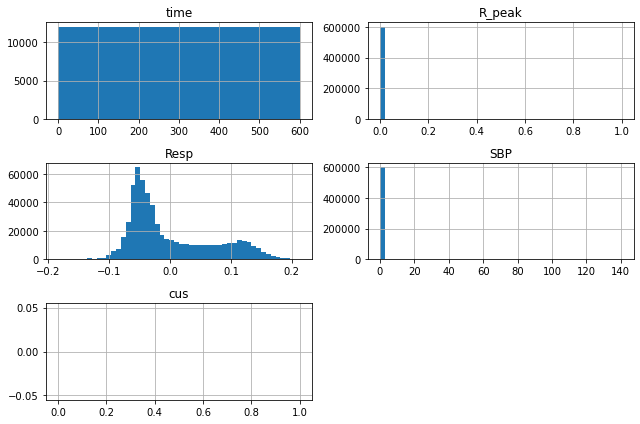

In [14]:
get_histograms(df, 3)

FUNKCJA ŚREDNIEJ KROCZĄCEJ 

In [15]:
def breath_move_average(df, k):
    ma_values = []
    for i in range(len(df['Resp']) - k):
        ma_values.append(np.mean(df['Resp'][i : (i + k)]))
    df['Resp'][k:] = ma_values
    df.drop(range(len(df['Resp']) - k, len(df['Resp'])), inplace = True)

In [16]:
breath_move_average(df, 1000)

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [17]:
len(df['Resp'])

599000

In [18]:
def R_peak_to_breath(df):
    df['R_peak'] = df['R_peak'] * df['Resp']
    df['R_peak'].where(df['R_peak'] != 0, np.nan, inplace = True) # != #momenty w ktorych wystapil peak

In [19]:
R_peak_to_breath(df)

In [20]:
df

time  R_peak      Resp  SBP  cus
0         0.000     NaN -0.040770  0.0  NaN
1         0.001     NaN -0.040764  0.0  NaN
2         0.002     NaN -0.040758  0.0  NaN
3         0.003     NaN -0.040751  0.0  NaN
4         0.004     NaN -0.040744  0.0  NaN
...         ...     ...       ...  ...  ...
598995  598.995     NaN  0.037892  0.0  NaN
598996  598.996     NaN  0.037757  0.0  NaN
598997  598.997     NaN  0.037621  0.0  NaN
598998  598.998     NaN  0.037485  0.0  NaN
598999  598.999     NaN  0.037349  0.0  NaN

[599000 rows x 5 columns]

FUNKCJA TWORZĄCA WYKRES ODDECHU OD 10 DO 30 SEKUNDY BADANIA

In [21]:
def get_breath_plot(df, file_index):
    start = 10000
    end = 30000

    plt.plot(df['time'][start : end], df['Resp'][start : end], 'g.', markersize=4)

    plt.plot(df['time'][start : end], df['R_peak'][start : end], 'rx', markersize=10)

    plt.title("Breath " + data[file_index])
    plt.xlabel('Time [sec]')
    plt.ylabel('Breath value')
    plt.grid(True, alpha = 0.3)
    plt.savefig(os.path.join(os.path.join(plot_dir, data[file_index]), 'Breath ' + data[file_index] + '.jpg'), dpi=300 ) 
    plt.show()

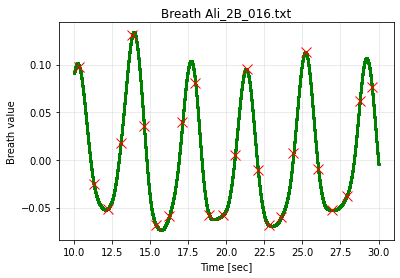

In [22]:
get_breath_plot(df, 3)

In [23]:
def get_section_breath_plot(df, file_index):
    start = 10000
    end = 30000
    
    for i in range(start,end):
        index = 1
        while(df['Resp'][i] == df['Resp'][i-index]):
            index += 1
        if df['Resp'][i] > df['Resp'][i-index]:
            col = 'green'
        else:
            col = 'deepskyblue'
        plt.plot(df['time'][i], df['Resp'][i], 'g.', markersize = 4, color = col)
        
    plt.plot(df['time'][start : end], df['R_peak'][start : end], 'rx', markersize=10)
    plt.title("Section breath " + data[file_index])
    plt.xlabel('Time [sec]')
    plt.ylabel('Breath value')
    plt.grid(True, alpha = 0.3)
    plt.savefig(os.path.join(os.path.join(plot_dir, data[file_index]), 'Section Breath ' + data[file_index] + '.jpg'), dpi=300 ) 
    plt.show()

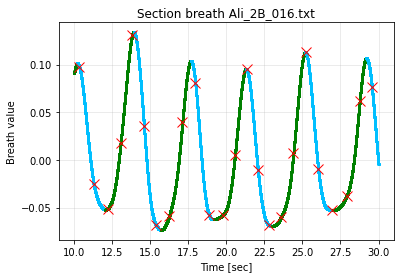

In [24]:
get_section_breath_plot(df, 3)

FUNKCJA ZWRACAJĄCA MOMENTY, W KTÓRYCH WYSTĄPIŁY PEAK'I

In [25]:
def get_R_peak_index(df):    
    R_peak_index = []
    for i in range(len(df)):
        if(math.isnan(df['R_peak'][i]) == False):
            R_peak_index.append(df['time'][i])
    return R_peak_index

In [26]:
R_peak_index = get_R_peak_index(df)

FUNKCJA ZWRACAJĄCA INTERWAŁY

In [27]:
def get_R_interval(R_peak_index):    
    R_interval = []
    for i in range(len(R_peak_index)-1):
        interval = R_peak_index[i+1] - R_peak_index[i]
        R_interval.append(interval * 1000) #zamiana na ms
    return R_interval

In [28]:
R_interval = get_R_interval(R_peak_index)
R_interval

[791.9999999999997,
 774.0000000000005,
 752.9999999999997,
 755.0000000000003,
 760.9999999999997,
 786.9999999999999,
 745.9999999999995,
 784.0000000000007,
 818.9999999999991,
 921.0000000000011,
 910.9999999999995,
 926.9999999999995,
 947.0000000000009,
 927.9999999999991,
 840.9999999999993,
 769.9999999999995,
 765.0000000000006,
 784.0000000000007,
 878.0000000000001,
 867.0000000000009,
 845.9999999999966,
 906.0000000000024,
 884.999999999998,
 812.0000000000048,
 762.9999999999945,
 746.0000000000058,
 736.9999999999983,
 778.9999999999999,
 817.9999999999978,
 794.9999999999982,
 835.0000000000009,
 929.9999999999998,
 938.0000000000024,
 855.0000000000005,
 798.9999999999995,
 786.0000000000014,
 766.9999999999959,
 783.9999999999989,
 762.0000000000075,
 800.9999999999948,
 850.0000000000014,
 932.0000000000022,
 873.9999999999952,
 816.0000000000025,
 837.0000000000033,
 835.9999999999985,
 789.9999999999991,
 756.0000000000002,
 766.0000000000053,
 793.9999999999969,
 

FUNKCJA ZWRACAJĄCA ŚREDNIĄ DŁUGOŚĆ INTERWAŁU

In [29]:
def get_R_interval_mean(R_interval):    
    return np.array(R_interval).mean() #norma > 750ms

In [30]:
get_R_interval_mean(R_interval)

792.7665782493368

FUNKCJA ZWRACAJĄCA ODCHYLENIE STANDARDOWE DŁUGOŚCI INTERWAŁU

In [31]:
def get_SDNN(R_interval):
    return np.array(R_interval).std() #norma 140 +- 40

In [32]:
get_SDNN(R_interval)

64.03150043098144

FUNKCJA ZWRACAJĄCA RÓŻNICE MIĘDZY n+1 A n-tym INTERWAŁEM   

In [33]:
def get_R_diff_interval(R_interval): 
    R_diff_interval = []
    for i in range(len(R_interval)-1):
        diff = R_interval[i+1] - R_interval[i]
        R_diff_interval.append(diff)
    return R_diff_interval

In [34]:
R_diff_interval = get_R_diff_interval(R_interval)

In [35]:
R_diff_interval

[-17.999999999999204,
 -21.000000000000796,
 2.000000000000682,
 5.999999999999318,
 26.000000000000227,
 -41.00000000000034,
 38.00000000000114,
 34.99999999999841,
 102.00000000000205,
 -10.000000000001592,
 16.0,
 20.000000000001364,
 -19.00000000000182,
 -86.99999999999977,
 -70.99999999999977,
 -4.999999999998977,
 19.000000000000114,
 93.99999999999943,
 -10.999999999999204,
 -21.00000000000432,
 60.0000000000058,
 -21.000000000004434,
 -72.99999999999318,
 -49.00000000001023,
 -16.999999999988745,
 -9.000000000007503,
 42.00000000000159,
 38.999999999997954,
 -22.99999999999966,
 40.00000000000273,
 94.99999999999886,
 8.000000000002615,
 -83.00000000000193,
 -56.00000000000091,
 -12.999999999998181,
 -19.000000000005457,
 17.000000000002956,
 -21.99999999999136,
 38.99999999998727,
 49.000000000006594,
 82.0000000000008,
 -58.000000000006935,
 -57.999999999992724,
 21.000000000000796,
 -1.0000000000047748,
 -45.99999999999943,
 -33.99999999999886,
 10.000000000005116,
 27.99999

FUNKCJA ZWRACAJĄCA WYKRES POINCARE

In [36]:
def get_poincare_plot(R_diff_interval, file_index):
    plt.figure(figsize=(12,7))
    x = []
    y = []
    for i in range(len(R_diff_interval)-1):
        x.append(R_diff_interval[i])
        y.append(R_diff_interval[i+1])
    plt.scatter(x, y, color='deepskyblue', zorder=3)
    plt.title('Poincare plot: ' + data[file_index])
    plt.xlabel('R_n')
    plt.ylabel('R_n+1')
    plt.grid(True, zorder = 0, alpha = 0.3)
    plt.savefig(os.path.join(os.path.join(plot_dir, data[file_index]), 'Poincare ' + data[file_index] + '.jpg'), dpi=300 )
    plt.show()

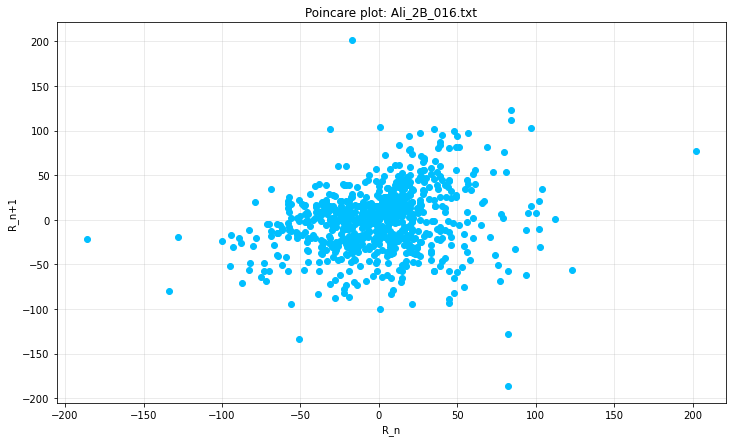

In [37]:
get_poincare_plot(R_diff_interval, 3)

FUNKCJA ZWRACAJĄCA PIERWIASTEK KWADRATOWY ZE ŚREDNIEJ SUMY KWADRATÓW RÓŻNIC MIĘDZY KOLEJNYMI INTERWAŁAMI

In [38]:
def get_RMSSD(R_diff_interval):
    RMSSD = np.array([np.power(R_diff_interval,2)])
    RMSSD = math.sqrt(RMSSD.mean())
    return RMSSD #norma 27 +- 12

In [39]:
get_RMSSD(R_diff_interval)

37.17274201621489

FUNKCJA ZWRACAJĄCA WSPÓŁCZYNNIK pNN50

In [40]:
def get_pNN50(R_diff_interval):    
    NN50 = list(filter(lambda x: (x > 50), R_diff_interval))
    pNN50 = len(NN50)/len(R_diff_interval)
    return pNN50

In [41]:
get_pNN50(R_diff_interval)

0.06905710491367861

FUNKCJA ZWRACAJĄCA WSPÓŁCZYNNIK pNN20

In [42]:
def get_pNN20(R_diff_interval):
    NN20 = list(filter(lambda x: (x > 20), R_diff_interval))
    pNN20 = len(NN20)/len(R_diff_interval)
    return pNN20

In [43]:
get_pNN20(R_diff_interval)

0.2456839309428951

FUNKCJA ZWRACAJĄCA ŚREDNIE CIŚNIENIE SKURCZOWE KRWI

In [44]:
def get_SBP_mean(df): 
    SBP = list(filter(lambda x: (x > 0), df['SBP']))
    return np.array(SBP).mean()

In [45]:
get_SBP_mean(df)

120.83191111111113

In [46]:
#def get_R_peak_counter_while_breath_in_out(df):
#    counter_in = 0
#    counter_out = 0
#    
#    for i in range(1,len(df)):
#        if not math.isnan(df['R_peak'][i]):
#            x = i - 1
#            while(df['Resp'][i] == df['Resp'][x]):
#                x -= 1
#            if df['Resp'][i] > df['Resp'][x]:
#                counter_in += 1
#                continue
#            if df['Resp'][i] < df['Resp'][x]:
#                counter_out += 1
#                
#    if not math.isnan(df['R_peak'][0]):
#        x = 1            
#        while(df['Resp'][0] == df['Resp'][x]):
#            x += 1
#        if df['Resp'][0] > df['Resp'][x]:
#            counter_out += 1
#        if df['Resp'][0] < df['Resp'][x]:
#            counter_in += 1
#        
#    return counter_in, counter_out

In [47]:
#get_R_peak_counter_while_breath_in_out(df)

FUNKCJA ZLICZAJĄCA WYSTĄPIENIA PEAK'ÓW PODCZAS WDECHU I WYDECHU

In [48]:
def R_peak_counter_while_breath_in_out(df):
    counter_in = 0
    counter_out = 0
    R_peak_index = get_R_peak_index(df)
    
    for i in R_peak_index:
        index = round(i*1000,3) #przejscie z time do indeks
        if index != 0:
            x = index - 1
            while(df['Resp'][index] == df['Resp'][x]):
                x -= 1
            if df['Resp'][index] > df['Resp'][x]: #wdech
                counter_in += 1
                continue
            if df['Resp'][index] < df['Resp'][x]: #wydech
                counter_out += 1
        else:
            x = index + 1
            while(df['Resp'][0] == df['Resp'][x]): #jesli peak wystapi w 0 to nie mozemy sie cofnac w czasie jak wyzej 
                x += 1
            if df['Resp'][0] > df['Resp'][x]:
                counter_out += 1
            if df['Resp'][0] < df['Resp'][x]:
                counter_in += 1
        
    return counter_in/len(R_peak_index) , counter_out/len(R_peak_index)

In [49]:
len(R_peak_index)

755

In [50]:
R_peak_counter_while_breath_in_out(df)

(0.5695364238410596, 0.4304635761589404)

FUNKCJA ZLICZAJĄCA PRZYSPIESZENIA I ZWOLNIENIA RYTMU SERCA PRZY WDECHU I WYDECHU

In [51]:
def heart_pulse_acc_dec_while_breath_in_out(df):
    R_peak_index = get_R_peak_index(df)
    R_interval = get_R_interval(R_peak_index)
    pulse = list(map(lambda x: round((1000/x) * 60), R_interval))
    
    R_peak_index = R_peak_index[2:len(R_peak_index)]
    
    #majac peak w R1 R2 R3 otrzymamy 2 przedzialy czasu miedzy peak`ami R2-R1=D1 i R3-R2=D2. Pi = (1/Di * 60) to puls w R(i+1) 
    #Z roznicy P1 i P2 otrzymamy informacje o przyspieszeniu lub spowolnieniu rytmu serca w R3, zatem ucinamy 2 pierwsze indeksy z R_peak_index, 
    #poniewaz juz dla R2 nie mozemy okreslic roznicy pulsu. Wynika to z faktu iz nie jestesmy w stanie okreslic pulsu przed R1
    
    acc_in = 0
    dec_in = 0
    acc_out = 0
    dec_out = 0
    index = 0
    
    for i in R_peak_index:
        i = round(i*1000,3) #z time przechodzimy do indeksu
        x = i - 1
        pulse_diff = pulse[index] - pulse[index + 1]
        while(df['Resp'][i] == df['Resp'][x]):
            x -= 1
        if df['Resp'][i] > df['Resp'][x]: #wdech
            if pulse_diff > 0:
                acc_in += 1
            if pulse_diff < 0:
                dec_in += 1
                
                
        if df['Resp'][i] < df['Resp'][x]: #wydech
            if pulse_diff > 0:
                acc_out += 1
            if pulse_diff < 0:
                dec_out += 1
                
        index += 1
    
    acc_in = acc_in/len(R_peak_index)
    dec_in = dec_in/len(R_peak_index)
    acc_out = acc_out/len(R_peak_index)
    dec_out = dec_out/len(R_peak_index)
    
    return acc_in, dec_in, acc_out, dec_out

In [52]:
heart_pulse_acc_dec_while_breath_in_out(df)

(0.2695883134130146,
 0.250996015936255,
 0.19123505976095617,
 0.16600265604249667)

FUNKCJA ZWRACAJĄCA MOMENTY, W KTÓRYCH WYSTĄPIŁ POMIAR CIŚNIENIA SKURCZOWEGO KRWI

In [53]:
def get_SBP_indexes(df):
    SBP_indexes = []
    for i in range(len(df['SBP'])):
        if df['SBP'][i] > 0:
            SBP_indexes.append(df['time'][i])
    return SBP_indexes

FUNKCJA ZWRACAJĄCA WARTOŚCI CIŚNIENIA SKURCZOWEGO KRWI

In [54]:
def get_SBP_values(df):
    SBP_values = list(filter(lambda x: x>0, df['SBP']))
    return SBP_values

FUNKCJA ZWRACAJĄCA RÓŻNICE MIĘDZY KOLEJNYMI WARTOŚCAMI CIŚNIENIA SKURCZOWEGO KRWI

In [55]:
def get_SBP_diff(SBP_values):
    SBP_diff = []
    for i in range(len(SBP_values)-1):
        SBP_diff.append(SBP_values[i+1] - SBP_values[i])
    return SBP_diff

FUNKCJA ZWRACAJĄCA ILOŚĆ WZROSTÓW I SPADKÓW CIŚNIENIA SKURCZOWEGO KRWI PRZY WDECHU I WYDECHU

In [56]:
def SBP_inc_dec_while_breath_in_out(df):
    SBP_indexes = get_SBP_indexes(df)
    SBP_values = get_SBP_values(df)
    SBP_diff = get_SBP_diff(SBP_values)
    
    inc_in = 0
    dec_in = 0
    inc_out = 0
    dec_out = 0
    index = 0
    
    SBP_indexes = SBP_indexes[1:len(SBP_indexes)]
    
    for i in SBP_indexes:
        i = round(i*1000,3) #z time przechodzimy do indeks
        x = i - 1
        while(df['Resp'][i] == df['Resp'][x]):
            x -= 1
        if df['Resp'][i] > df['Resp'][x]: #wdech
            if SBP_diff[index] > 0:
                inc_in += 1
            if SBP_diff[index] < 0:
                dec_in += 1
        if df['Resp'][i] < df['Resp'][x]: #wydech
            if SBP_diff[index] > 0:
                inc_out += 1
            if SBP_diff[index] < 0:
                dec_out += 1  
        index += 1
        
    inc_in = inc_in/len(SBP_indexes)
    dec_in = dec_in/len(SBP_indexes)
    inc_out = inc_out/len(SBP_indexes)
    dec_out = dec_out/len(SBP_indexes)
    
    return inc_in, dec_in, inc_out, dec_out

In [57]:
SBP_inc_dec_while_breath_in_out(df)

(0.2980132450331126,
 0.24370860927152319,
 0.223841059602649,
 0.2185430463576159)

FUNKCJA TWORZĄCA PLIK EXCEL Z WYLICZONYMI WARTOŚCIAMI KAŻDEGO PACJENTA

In [61]:
def make_excel_dataset():
    
    SDNNs = []
    RMSSDs = []
    pNN50 = []
    pNN20 = []
    SBP_means = []
    counters_in = []
    counters_out = []
    accelerations_in = []
    decelerations_in = []
    accelerations_out = []
    decelerations_out = []
    increasing_in = []
    decreasing_in = []
    increasing_out = []
    decreasing_out = []
    labels = []
    index = 0
    
    for i in range(len(data)):
        os.makedirs(os.path.join(plot_dir, data[i]) , exist_ok = True)
        
        if data[i] == 'Jer_ 1A_027.txt':
            index = 5
        else:
            index = 4
        
        if int(data[i][index]) == 1: #1 - zdrowy, 2 - chory
            labels.append('zdrowy')
        else:
            labels.append('chory')
        
        df = load_serie(data_dir, data[i])
        df = clear_data(df)
        
        get_histograms(df, i)
        breath_move_average(df, 1000)
        R_peak_to_breath(df)
        get_breath_plot(df, i)
        get_section_breath_plot(df, i)
        
        R_peak_index = get_R_peak_index(df)
        R_interval = get_R_interval(R_peak_index)
        
        R_mean = get_R_interval_mean(R_interval)
        R_sdnn = get_SDNN(R_interval)
        
        R_diff_interval = get_R_diff_interval(R_interval)
        get_poincare_plot(R_diff_interval, i)
        
        R_RMSSD = get_RMSSD(R_diff_interval)
        R_pNN50 = get_pNN50(R_diff_interval)
        R_pNN20 = get_pNN20(R_diff_interval)
        
        counter_in, counter_out = R_peak_counter_while_breath_in_out(df)
        
        acc_in, dec_in, acc_out, dec_out = heart_pulse_acc_dec_while_breath_in_out(df)
        
        SBP_mean = get_SBP_mean(df)
        incr_in, decr_in, incr_out, decr_out = SBP_inc_dec_while_breath_in_out(df)
        
        SDNNs.append(R_sdnn)
        RMSSDs.append(R_RMSSD)
        pNN50.append(R_pNN50)
        pNN20.append(R_pNN20)
        SBP_means.append(SBP_mean)
        counters_in.append(counter_in)
        counters_out.append(counter_out)
        accelerations_in.append(acc_in)
        decelerations_in.append(dec_in)
        accelerations_out.append(acc_out)
        decelerations_out.append(dec_out)
        increasing_in.append(incr_in)
        decreasing_in.append(decr_in)
        increasing_out.append(incr_out)
        decreasing_out.append(decr_out)
        
        df = pd.DataFrame({'SDNN' : SDNNs,
                            'RMSSD' : RMSSDs,
                            'pNN50' : pNN50,
                            'pNN20' : pNN20,
                            'SBP_mean' : SBP_means,
                            'counter_in' : counters_in,
                            'counter_out' : counters_out,
                            'acc_in' : accelerations_in,
                            'dec_in' : decelerations_in,
                            'acc_out' : accelerations_out,
                            'dec_out': decelerations_out,
                            'incr_in' : increasing_in,
                            'decr_in' : decreasing_in,
                            'incr_out' : increasing_out,
                            'decr_out' : decreasing_out,
                            'label': labels})

        df.to_csv('Hypertension_dataset.csv', index=False)

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Ada_1A_007.txt


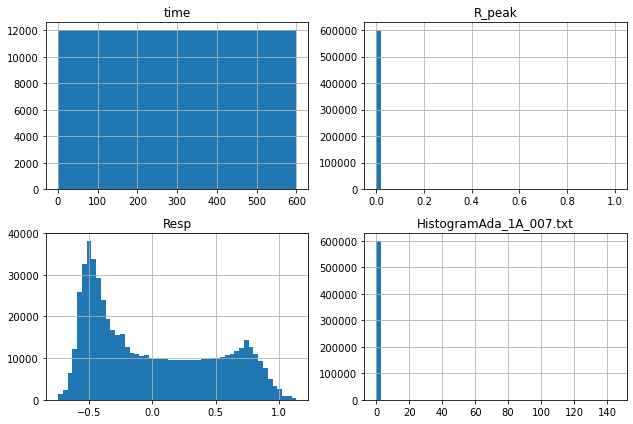

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


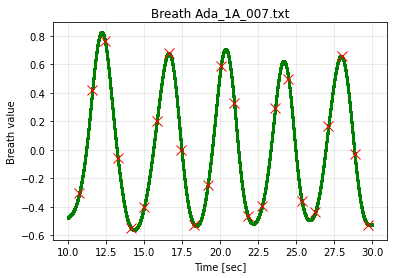

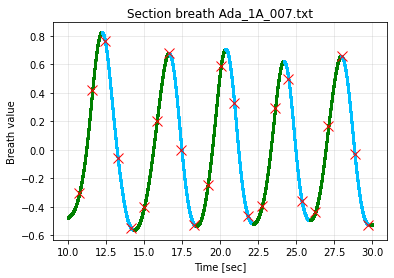

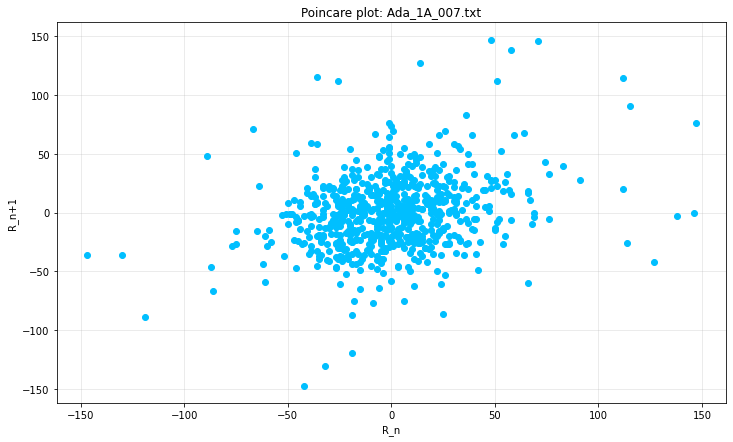

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Ada_2B_006.txt


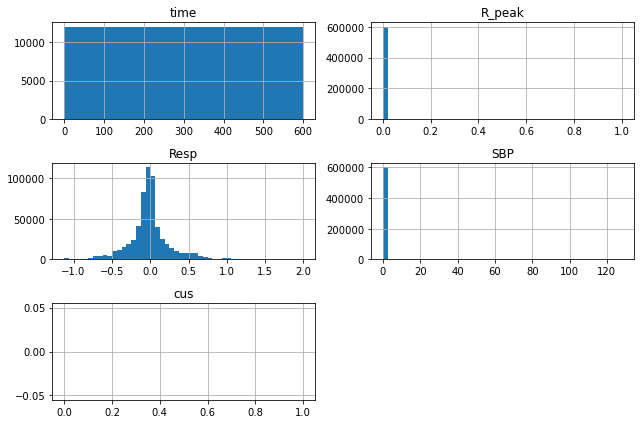

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


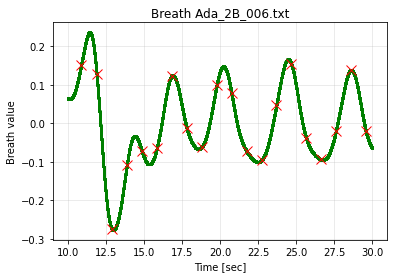

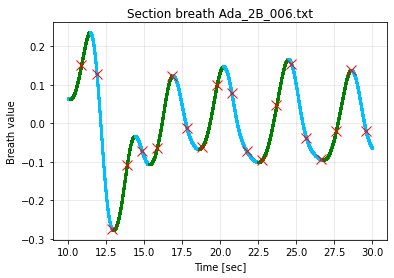

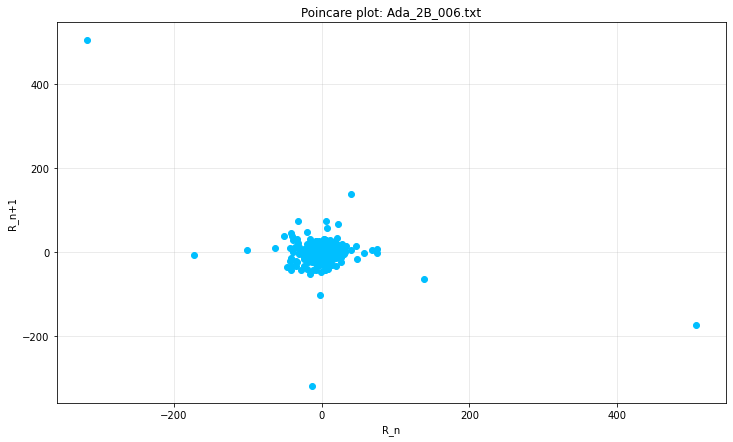

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Agn_1A_005.txt


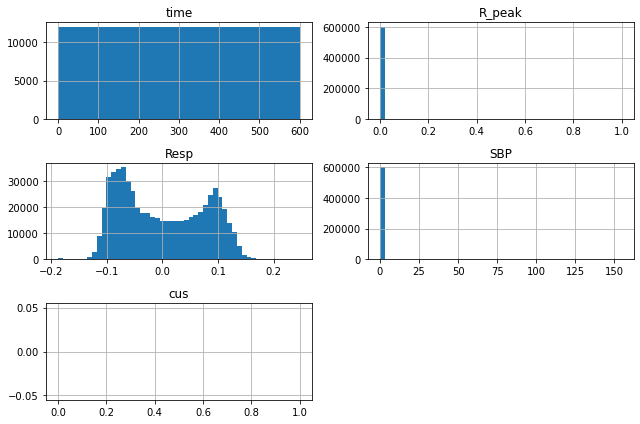

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


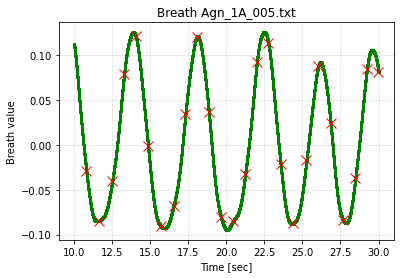

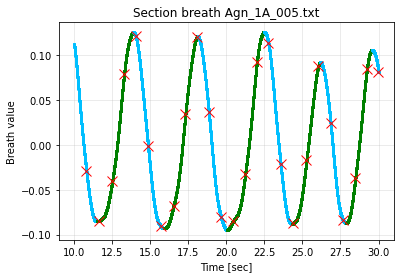

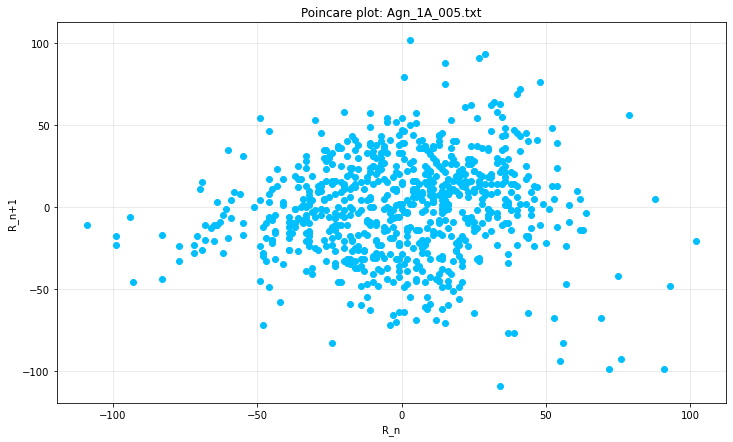

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Ali_2B_016.txt


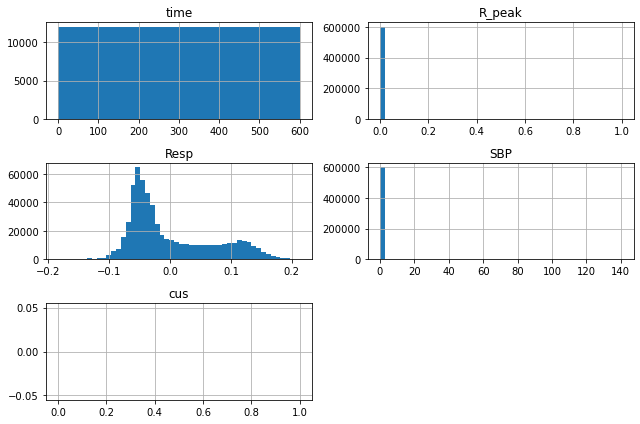

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


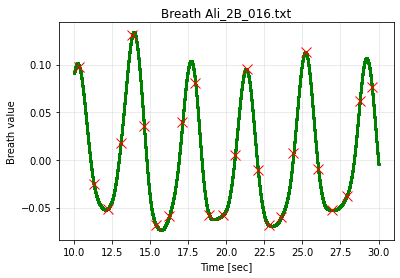

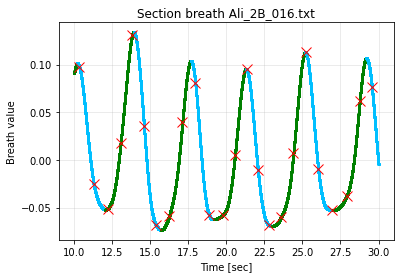

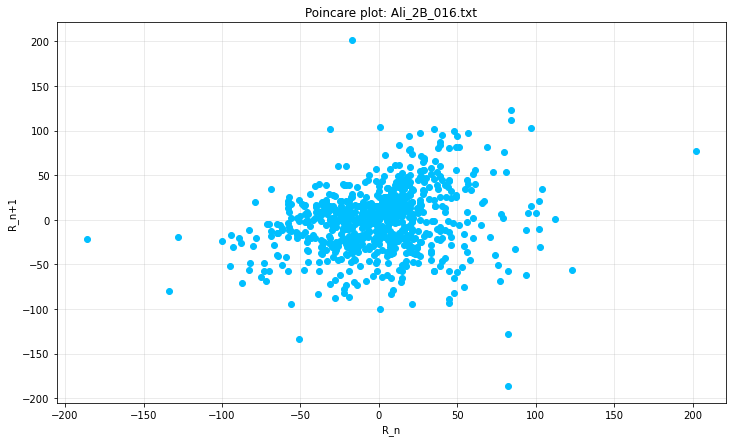

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data And_1A_017.txt


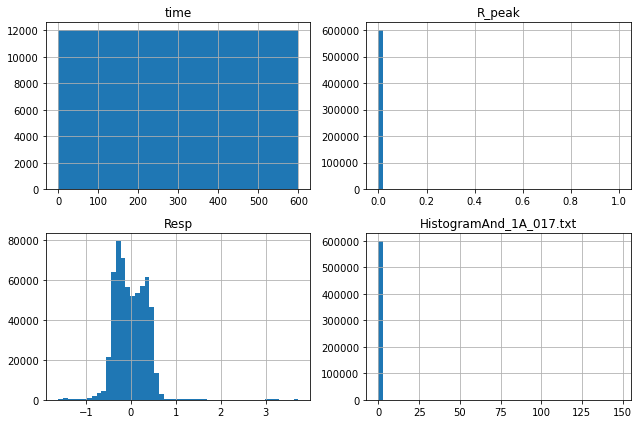

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


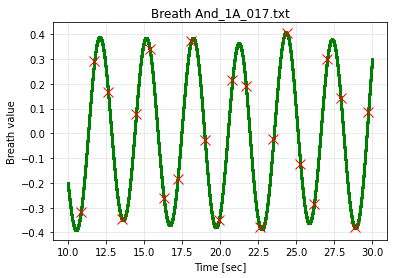

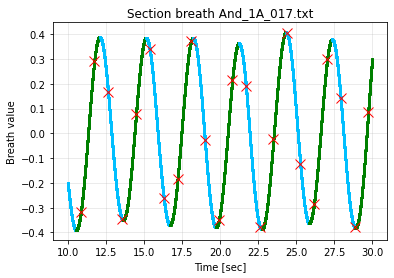

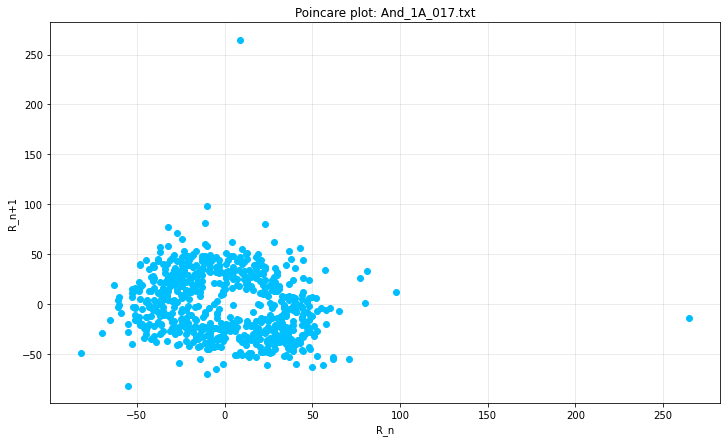

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data And_2B_020.txt


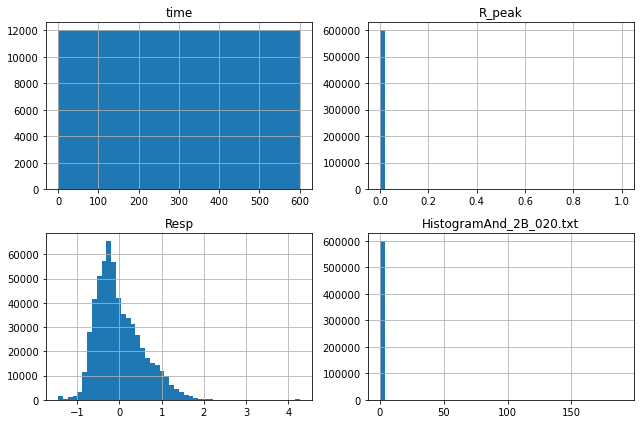

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


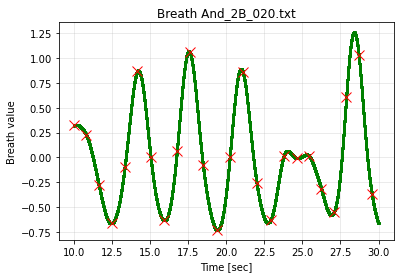

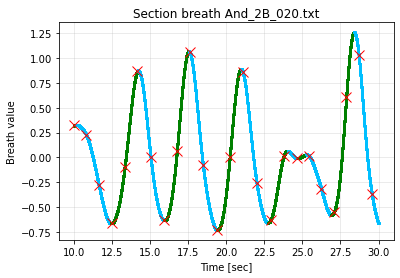

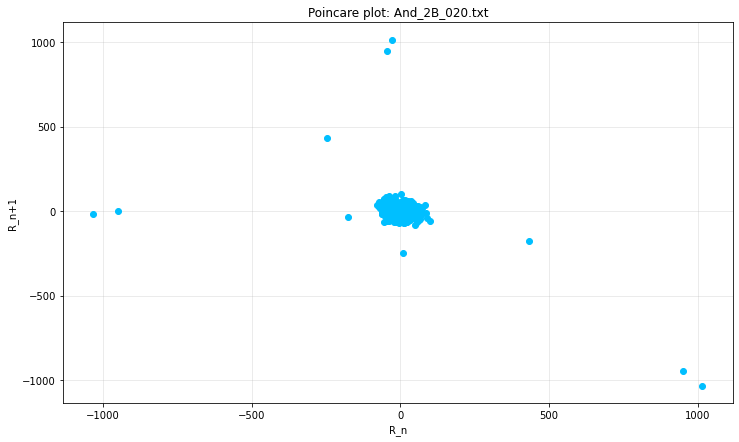

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Ann_2B_005.txt


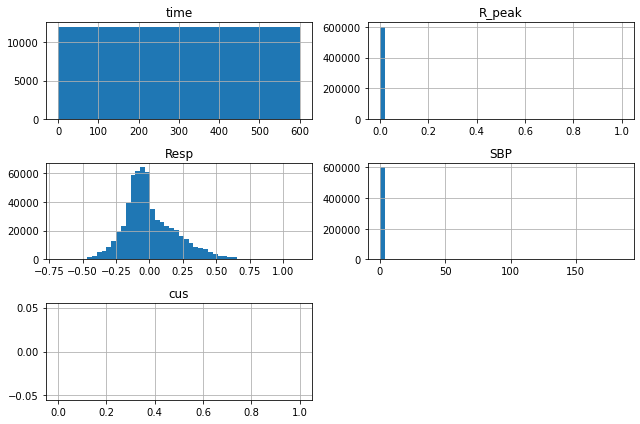

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


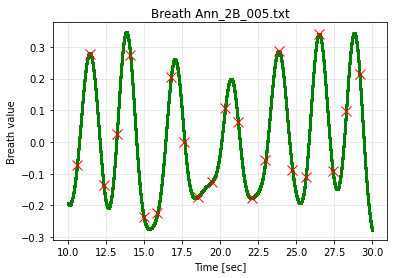

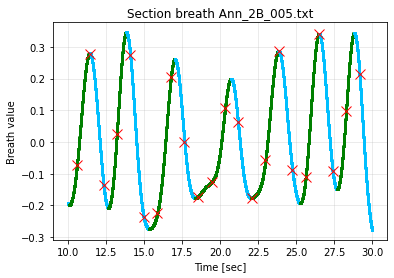

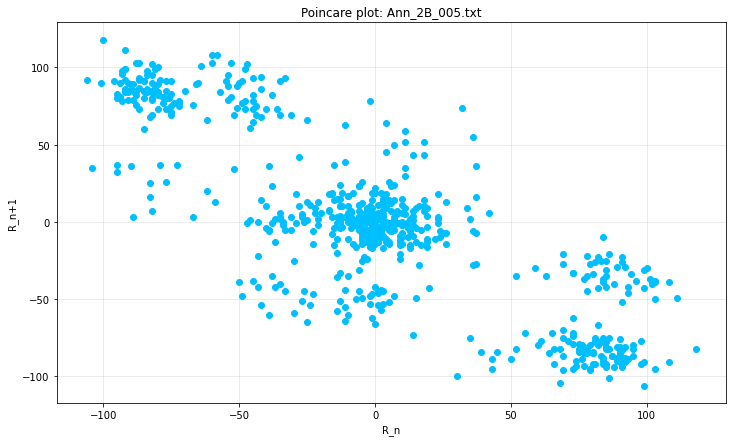

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Art_2B_011.txt


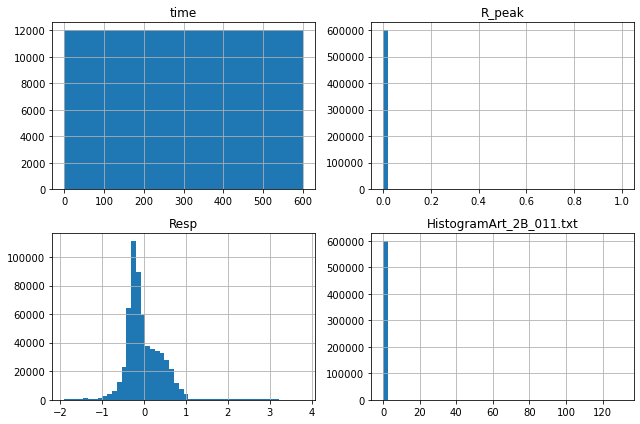

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


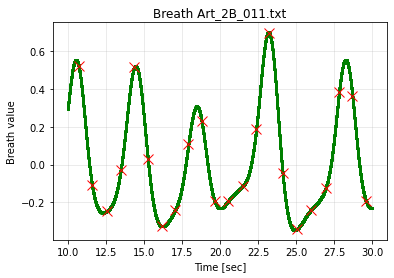

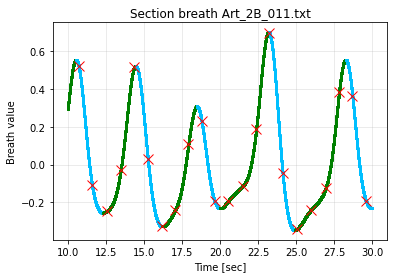

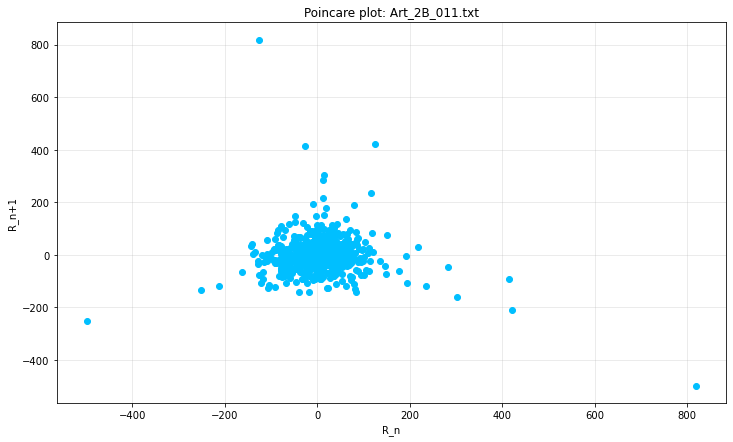

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Boz_2A_007.txt


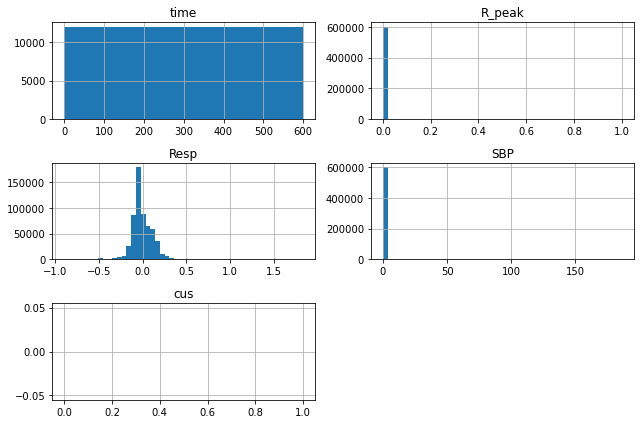

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


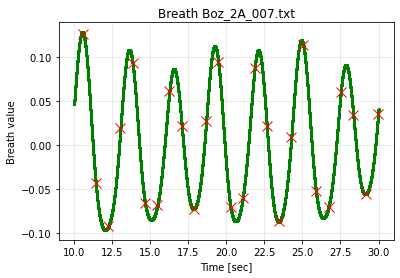

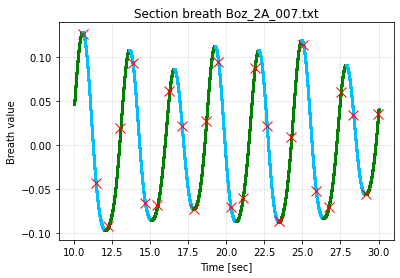

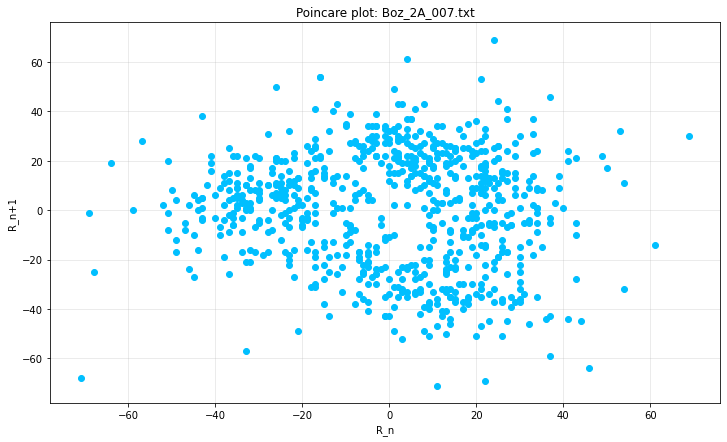

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Dor_2A_015.txt


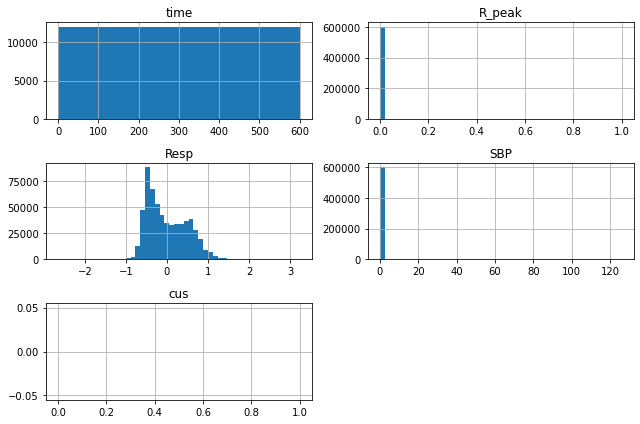

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


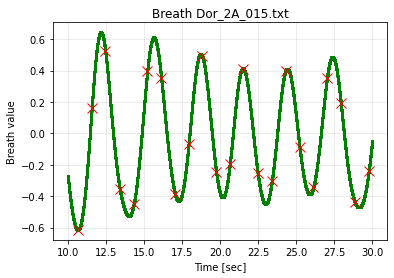

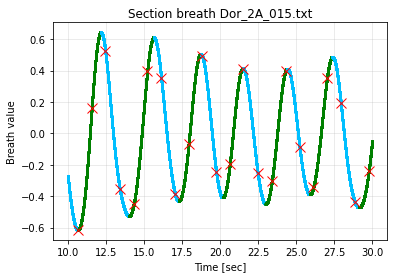

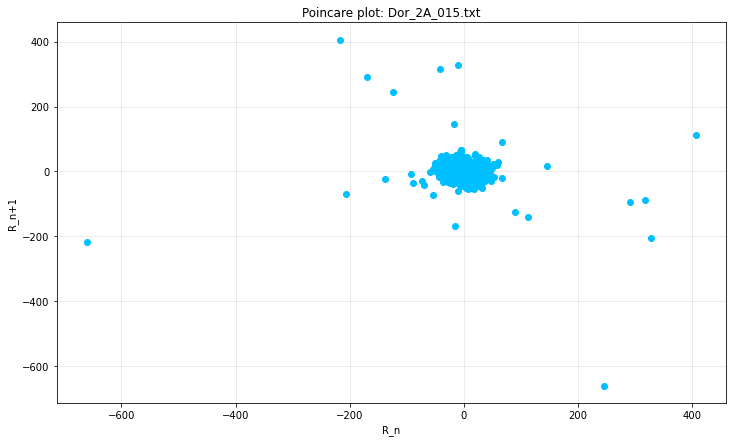

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Dor_2B_008.txt


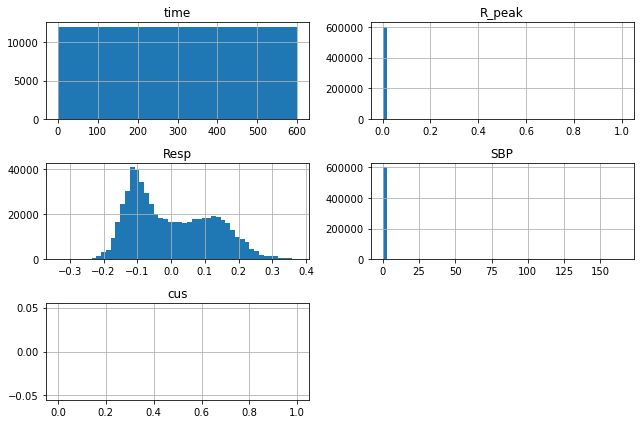

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


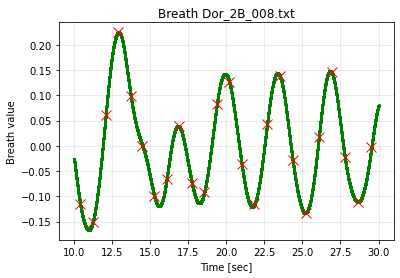

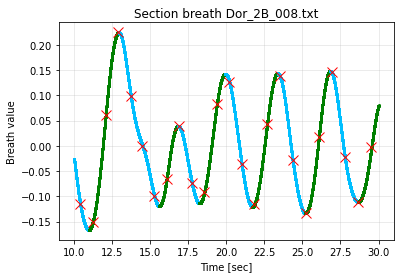

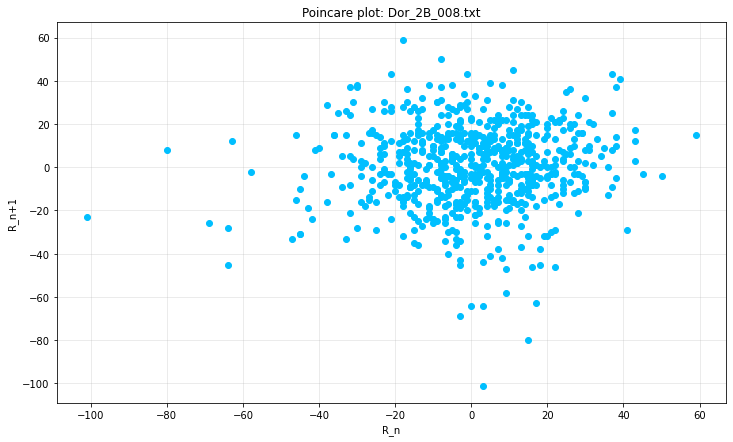

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Elz_1A_009.txt


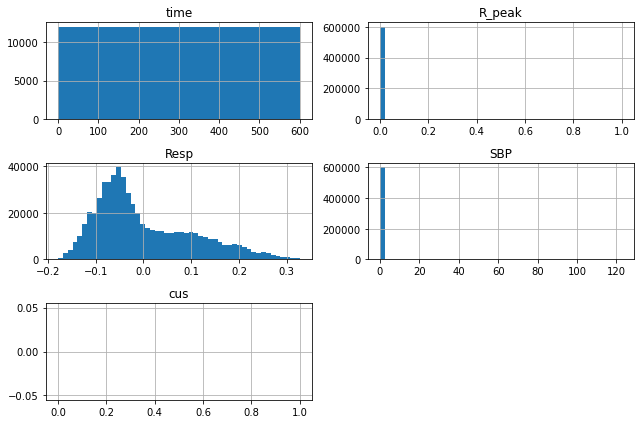

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


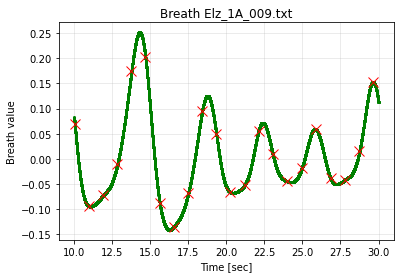

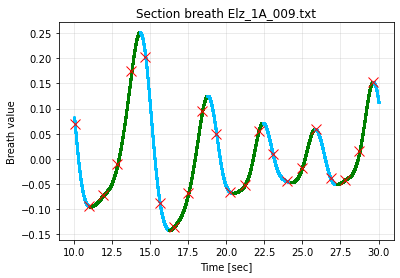

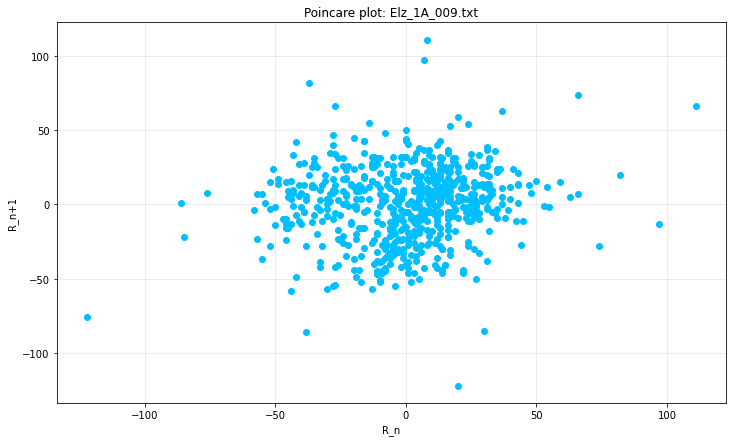

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Ewa_1B_003.txt


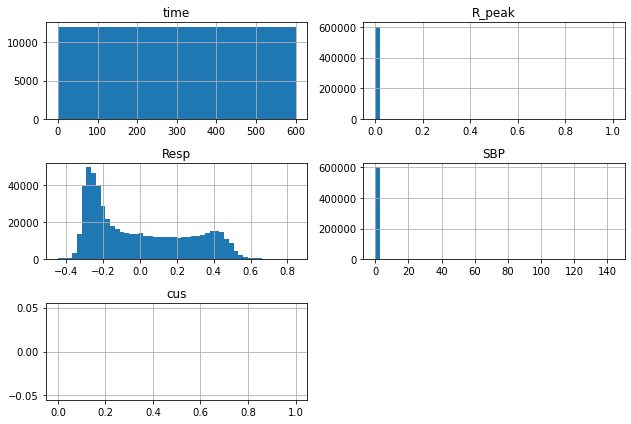

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


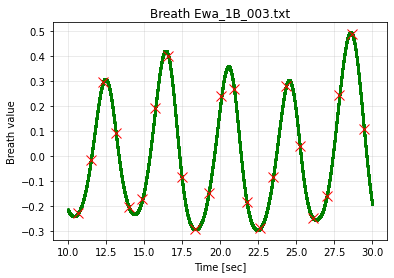

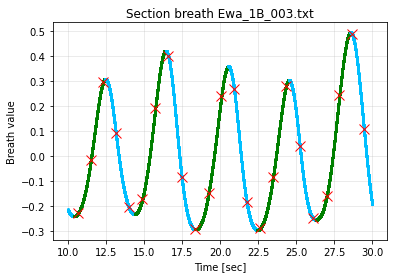

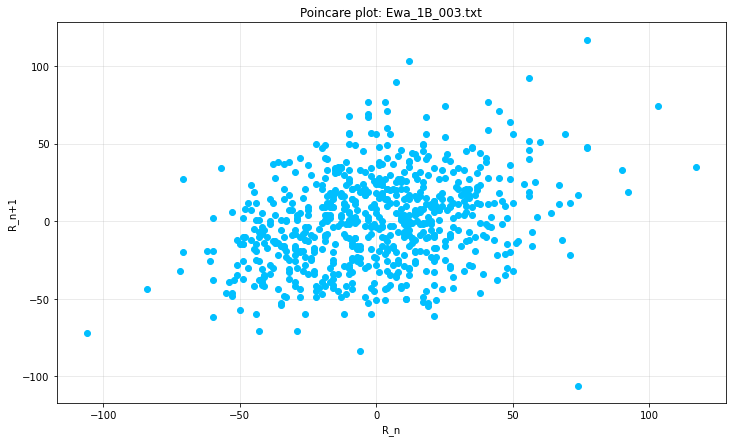

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Gra_1A_024.txt


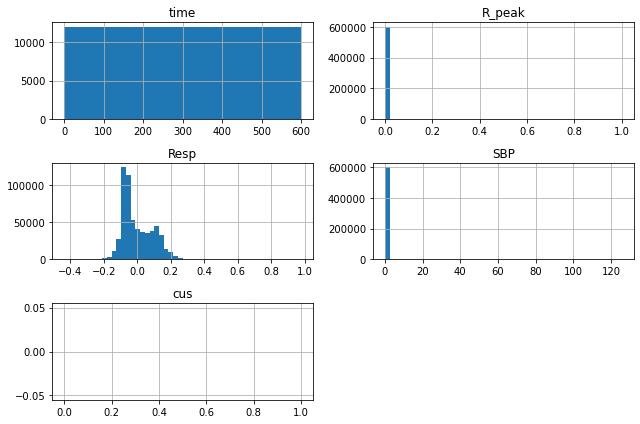

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


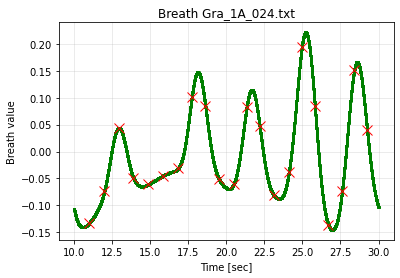

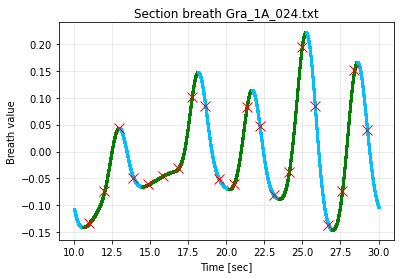

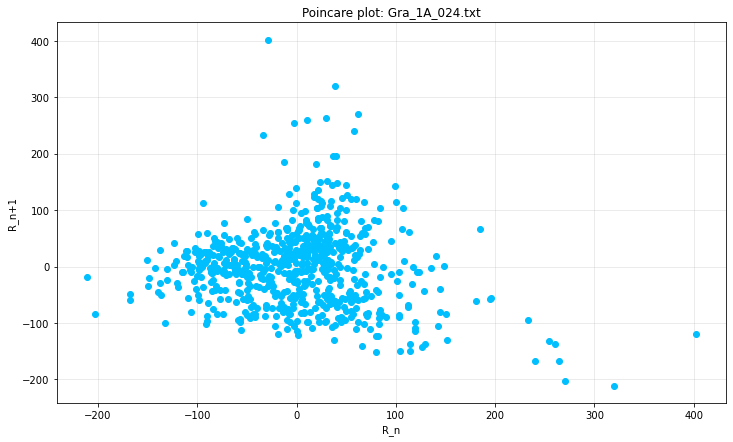

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Gra_2B_021.txt


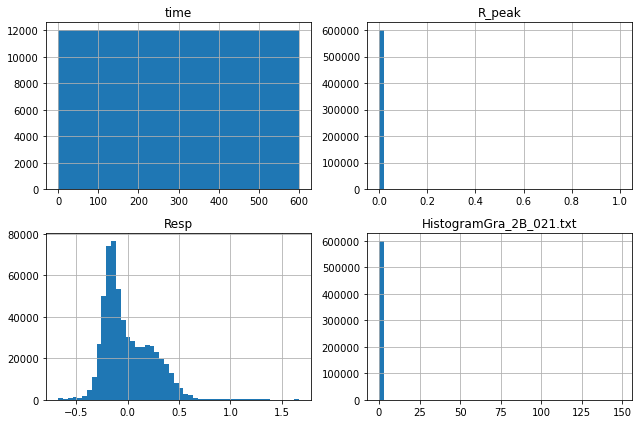

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


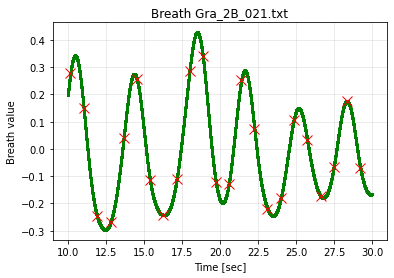

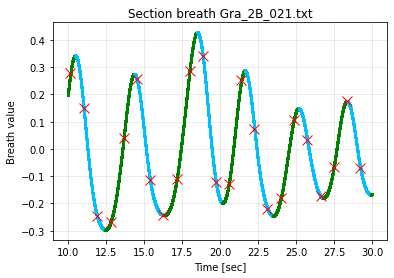

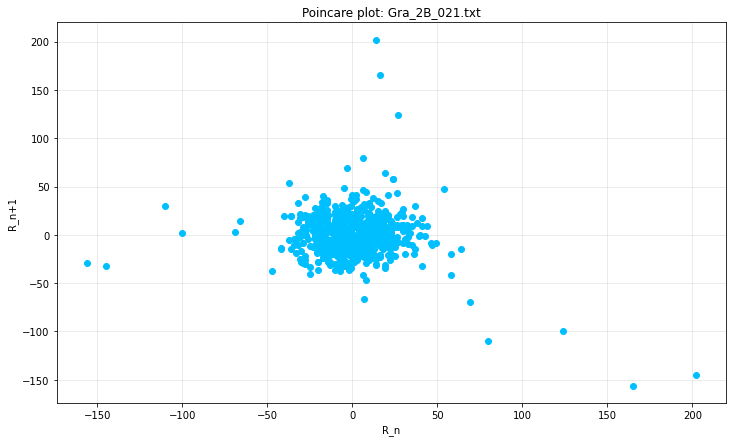

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Hel_1A_015.txt


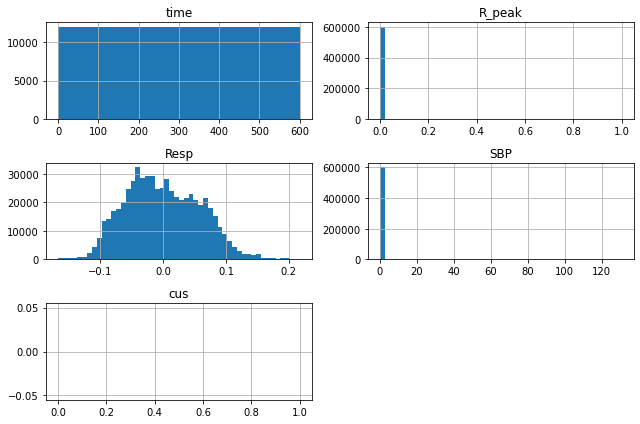

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


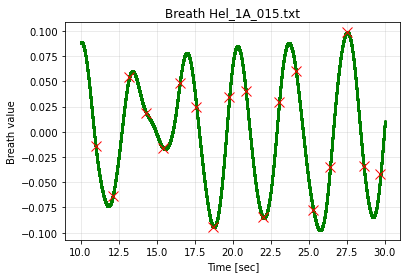

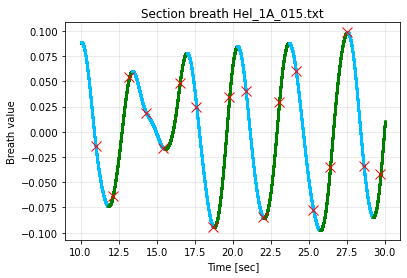

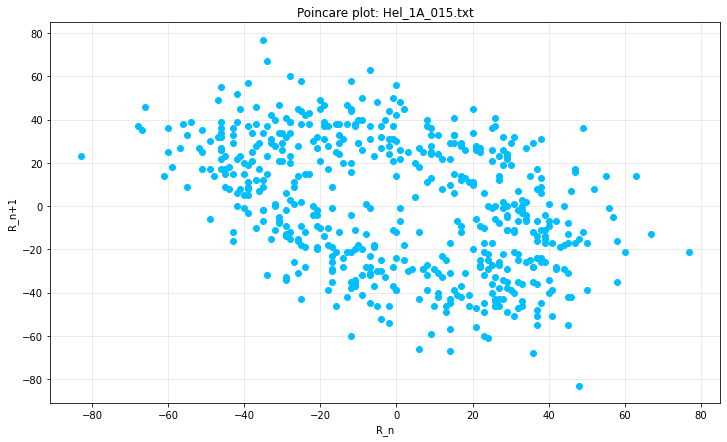

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Hen_2A_017.txt


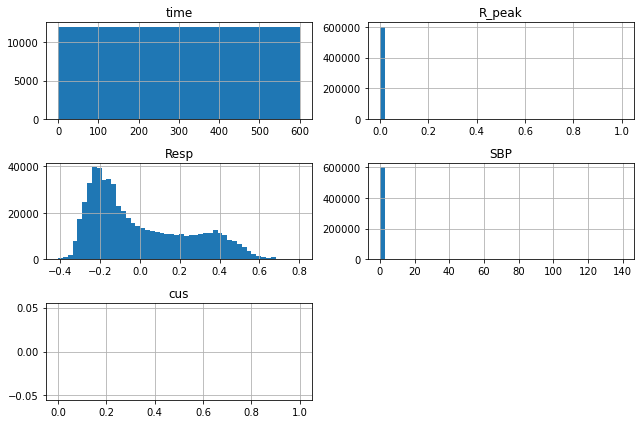

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


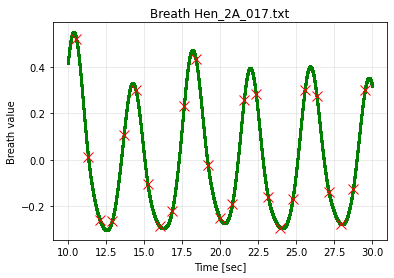

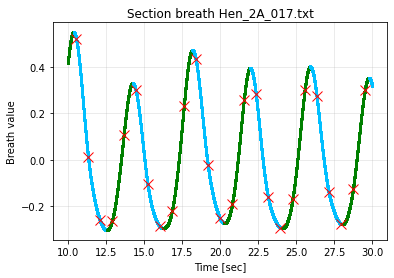

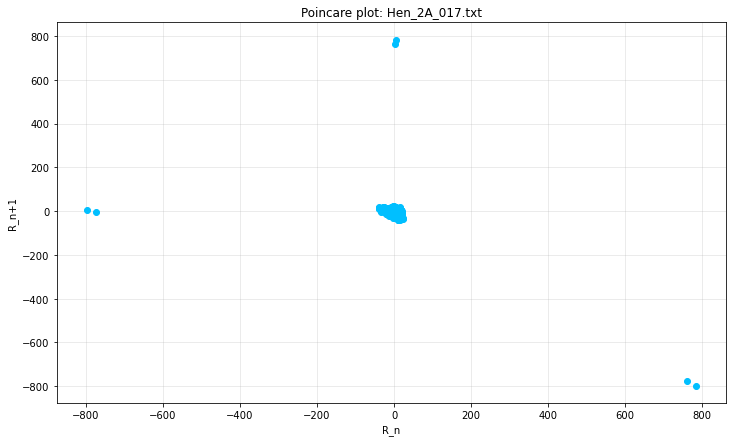

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Ire_2A_001.txt


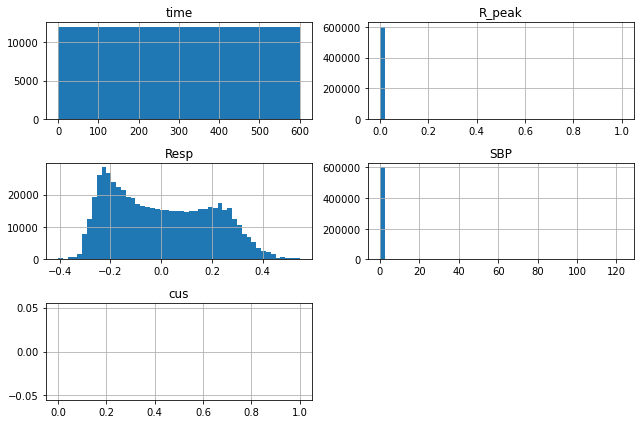

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


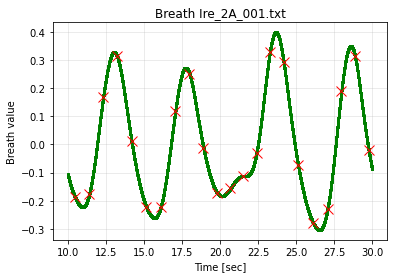

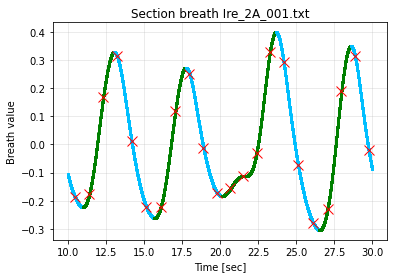

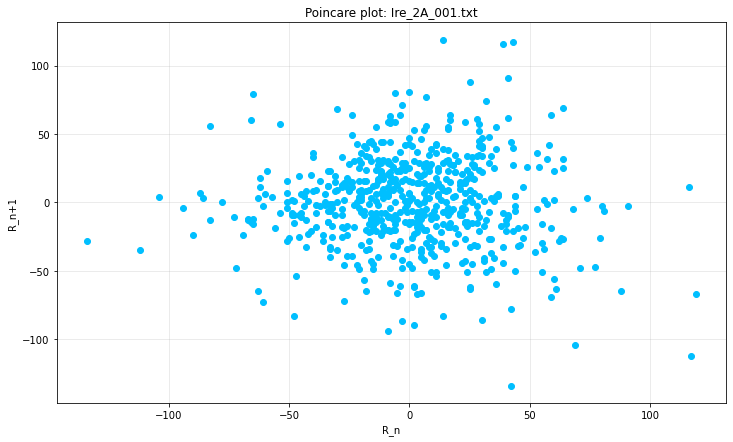

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Ire_2C_001.txt


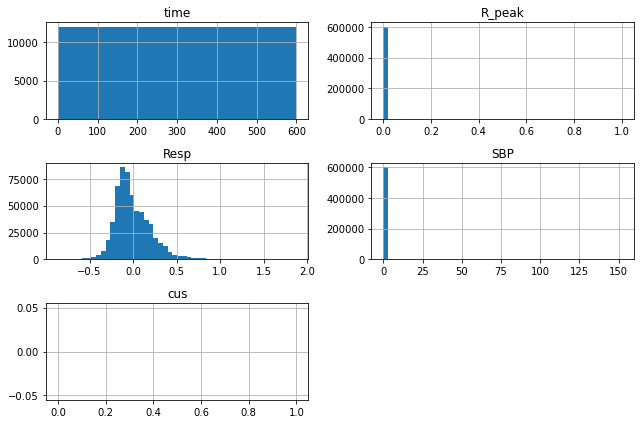

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


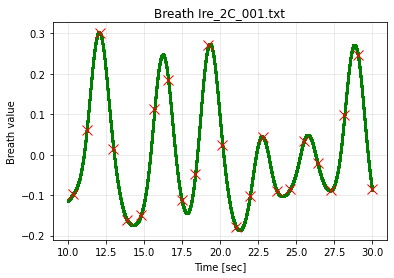

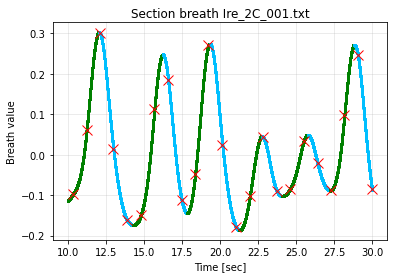

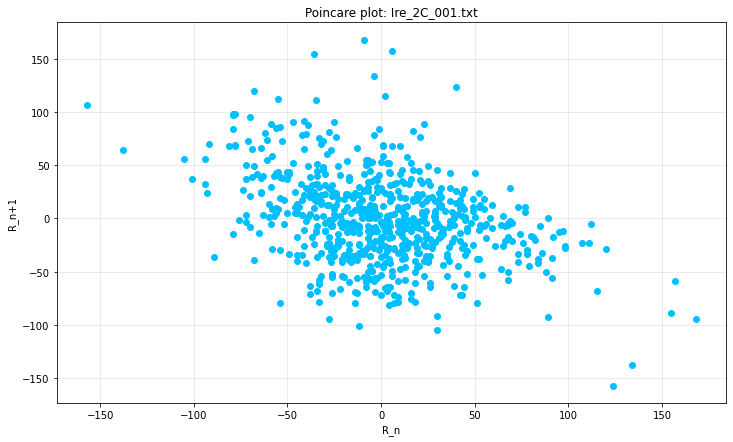

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Iwo_1A_020.txt


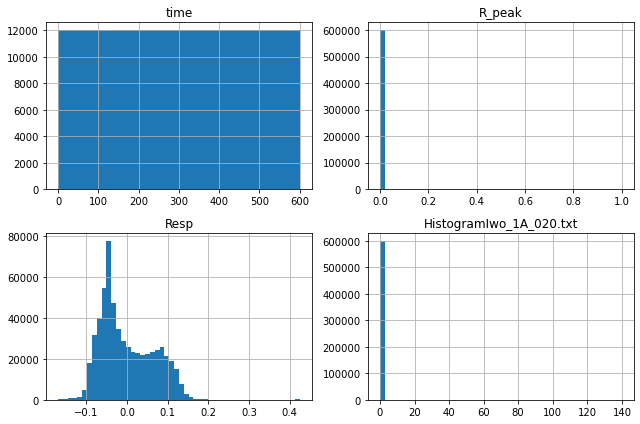

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


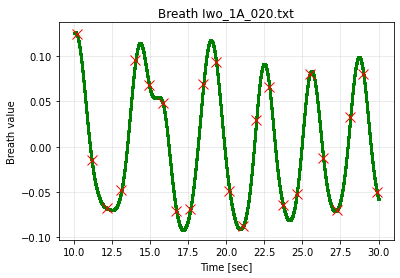

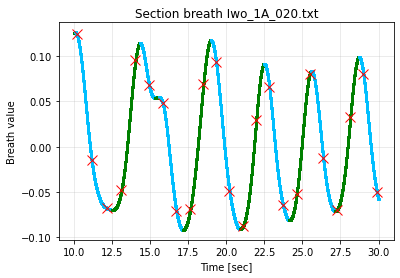

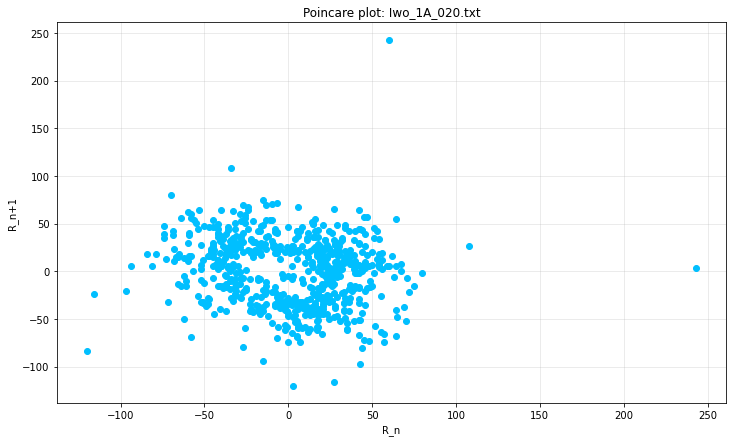

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Iza_2B_013.txt


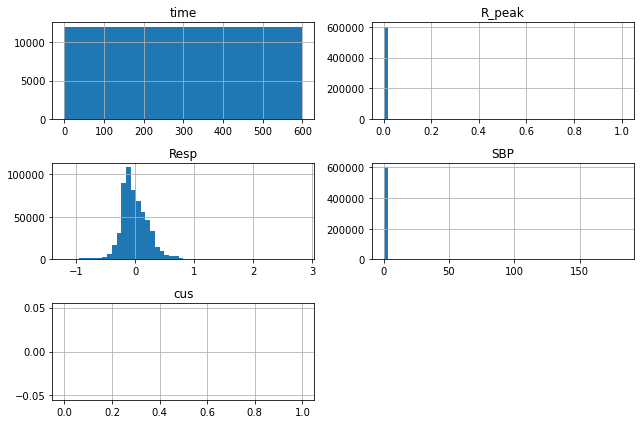

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


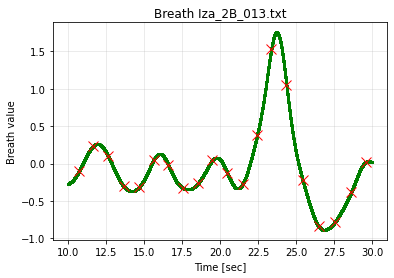

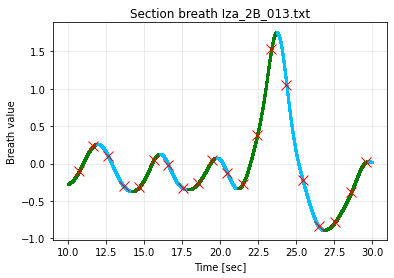

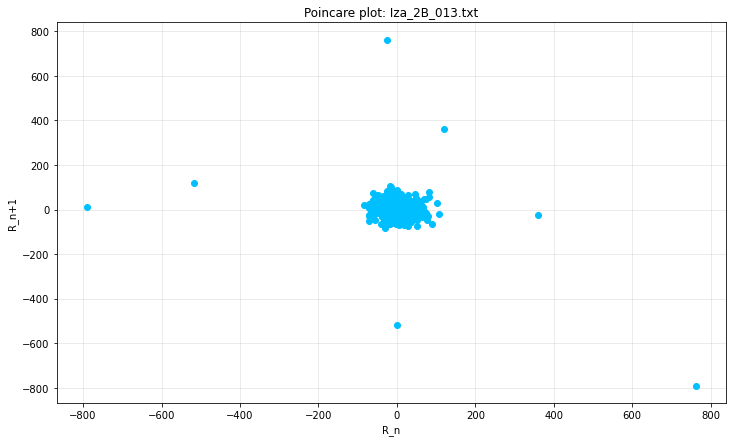

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Jac_1A_004.txt


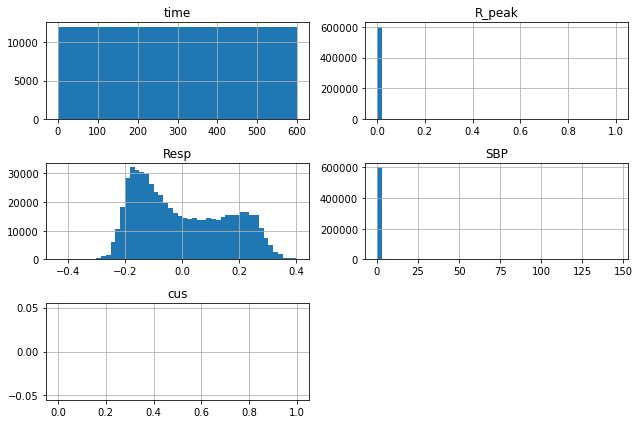

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


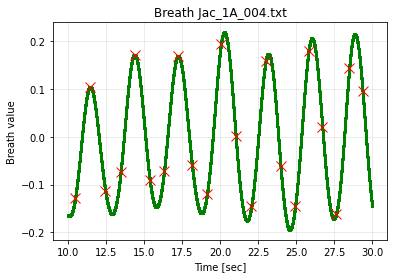

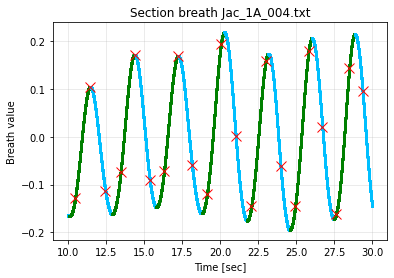

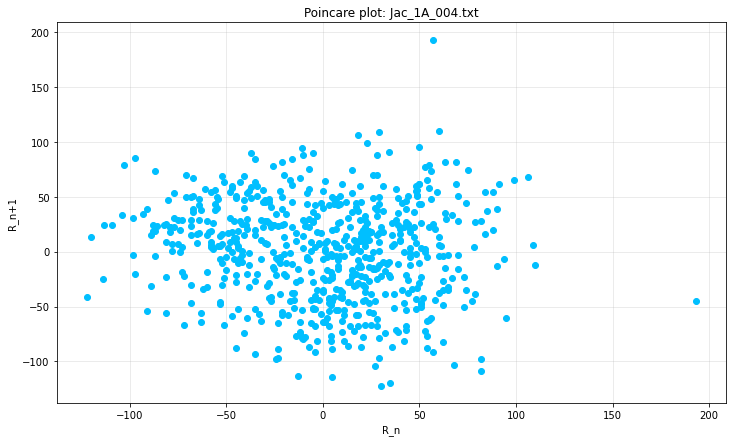

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Jac_2C_003.txt


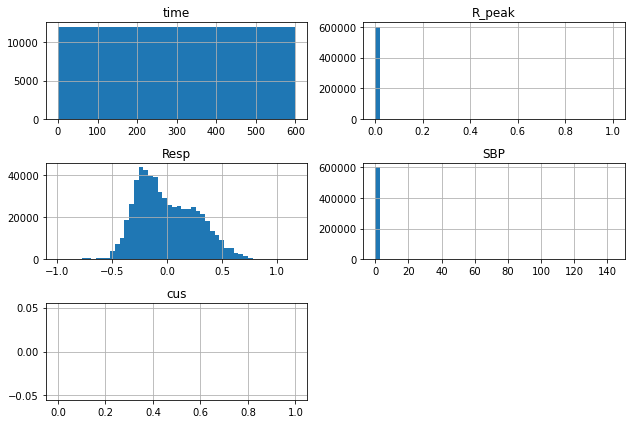

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


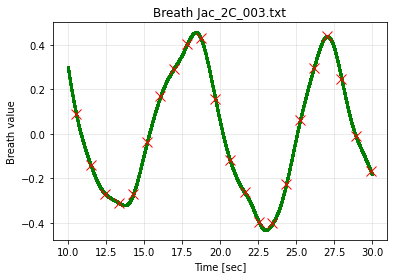

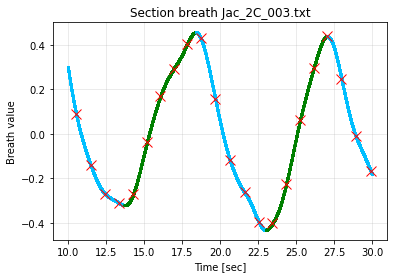

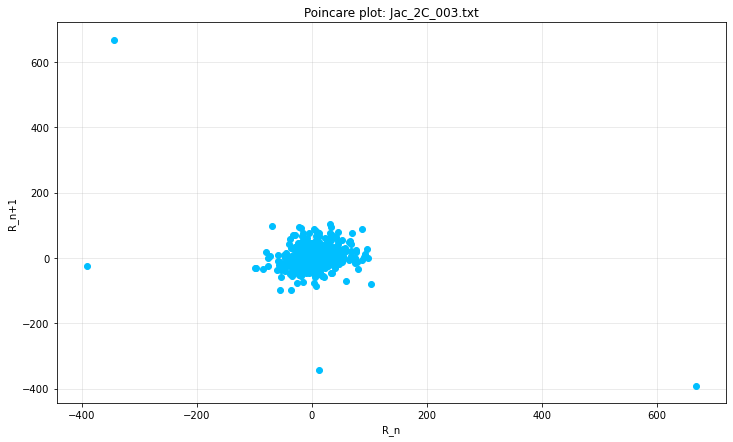

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Jak_1B_001.txt


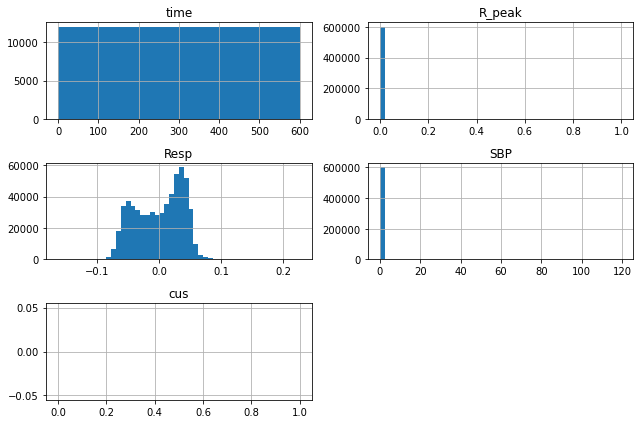

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


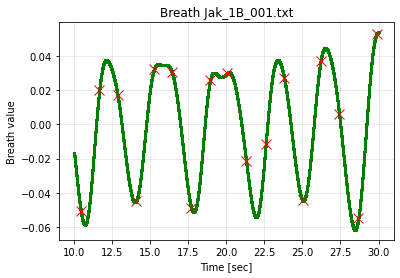

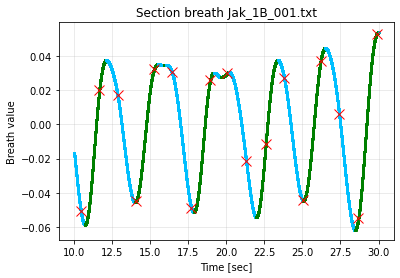

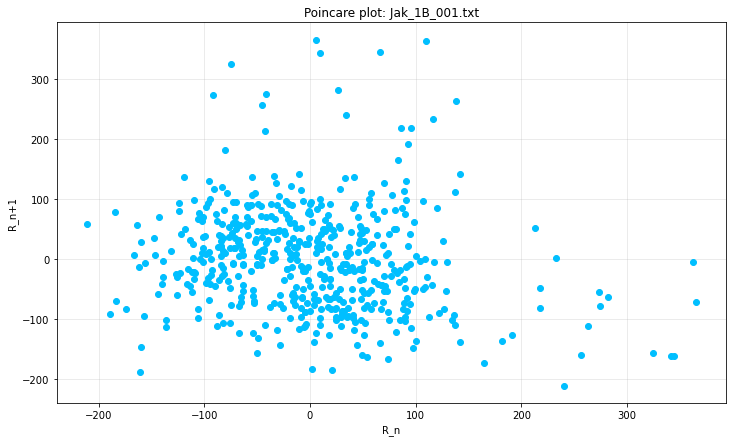

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Jan_1A_006.txt


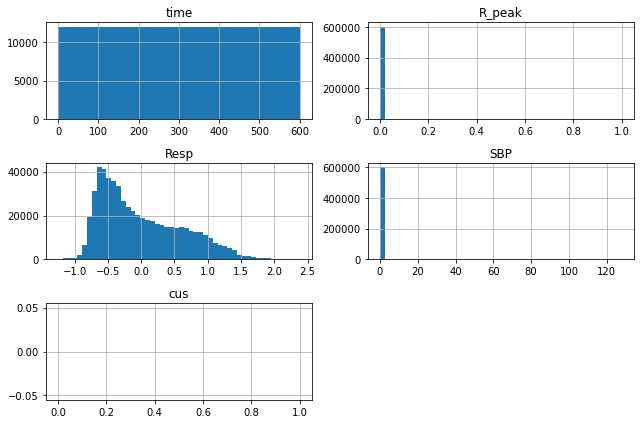

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


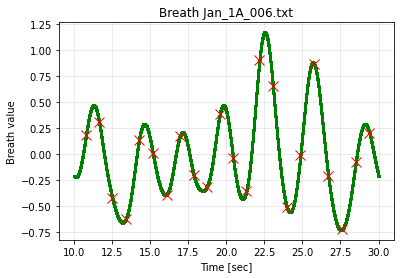

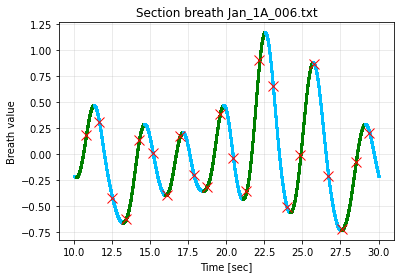

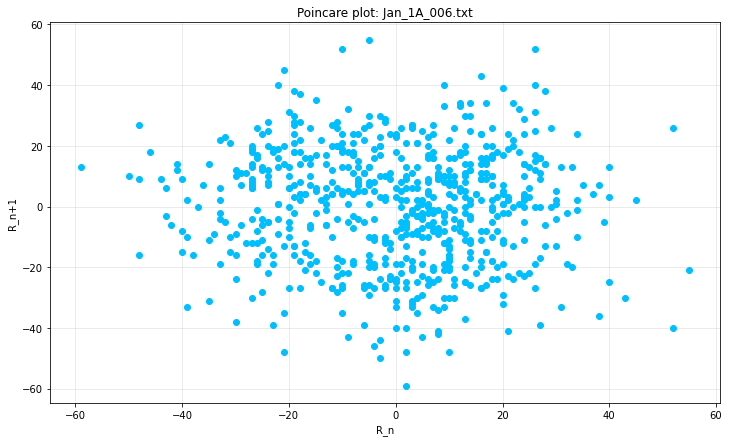

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Jan_1A_025.txt


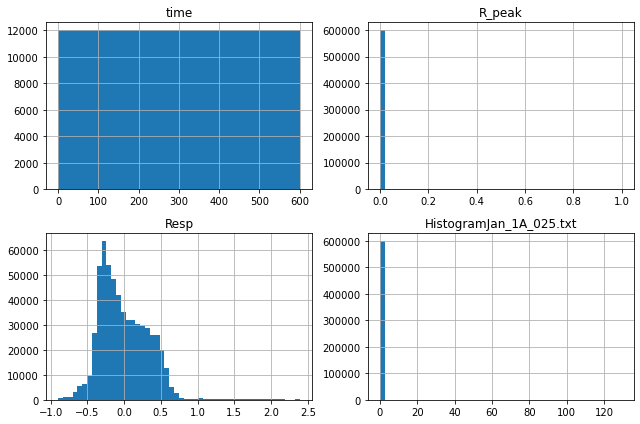

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


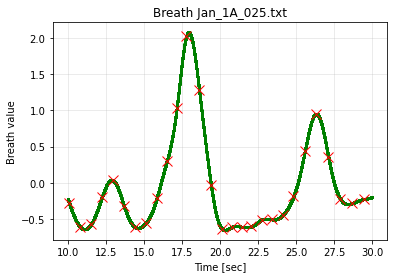

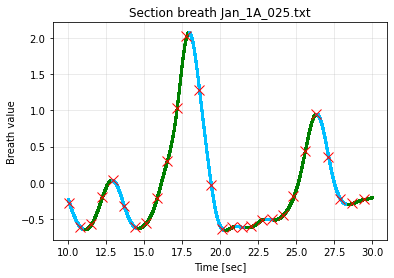

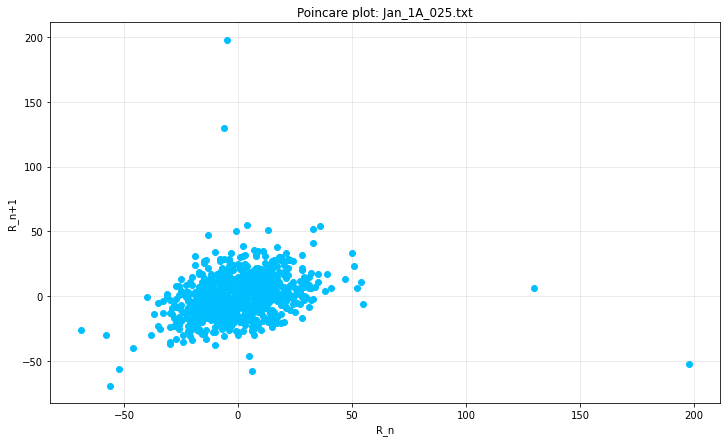

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Jan_2A_013.txt


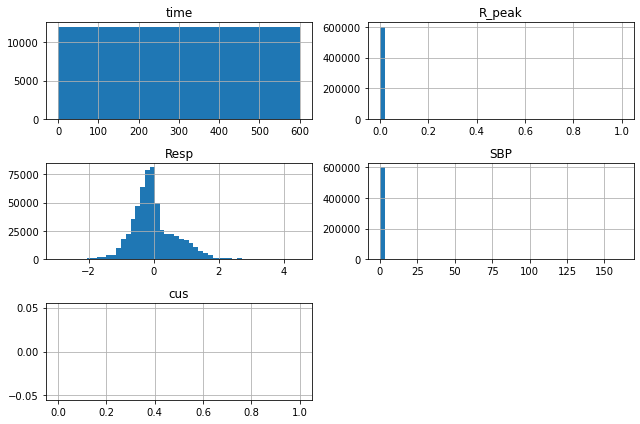

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


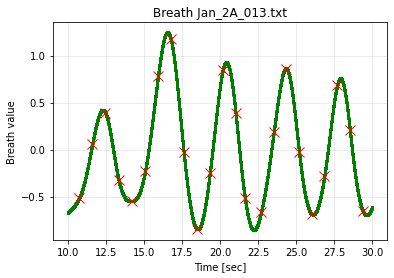

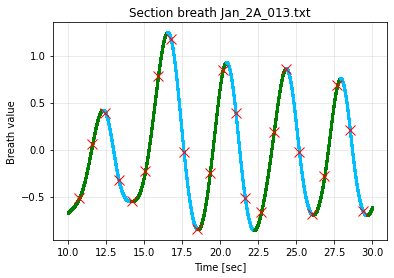

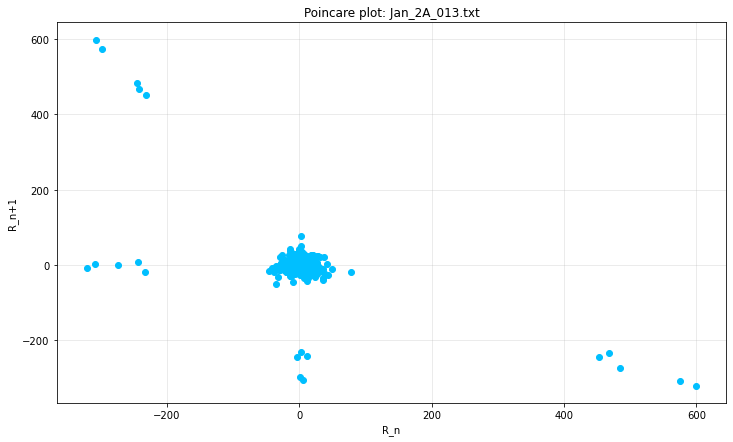

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Jan_2B_003.txt


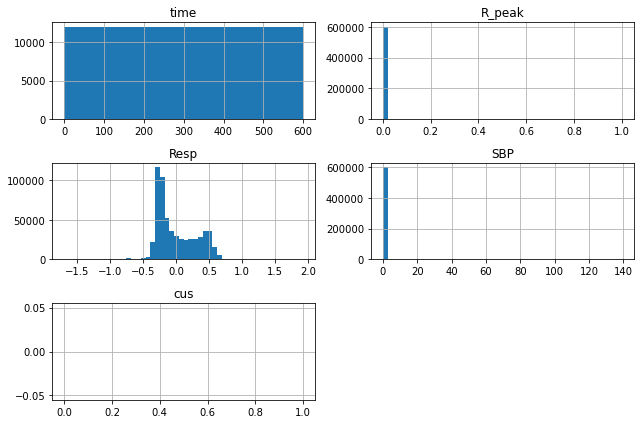

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


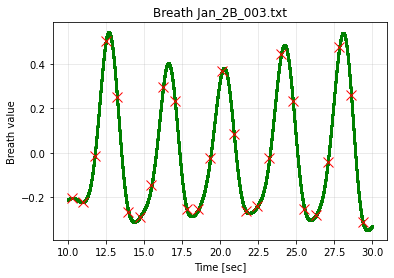

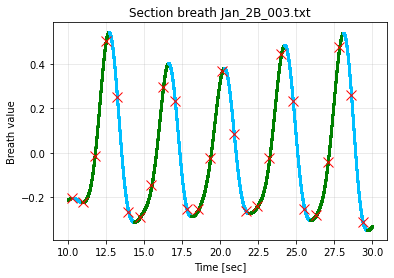

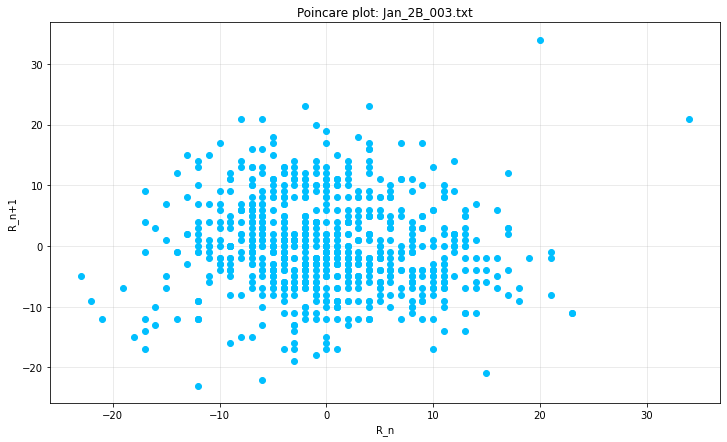

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Jar_1A_011.txt


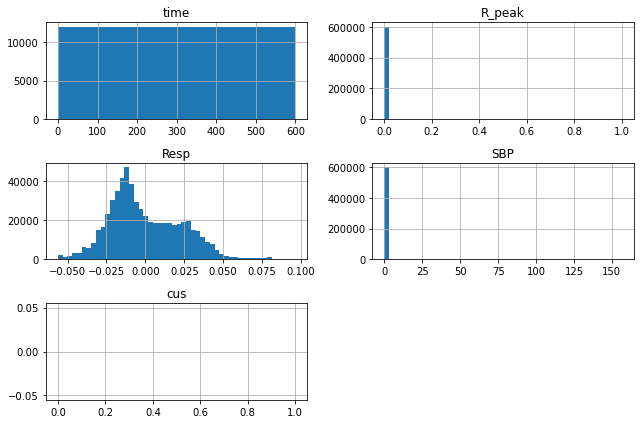

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


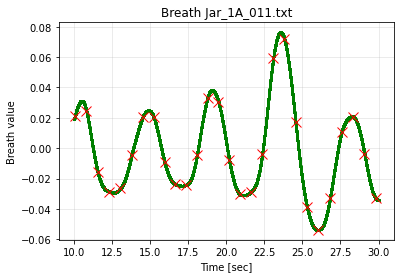

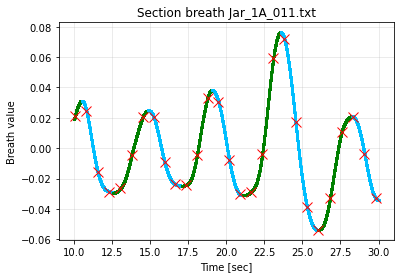

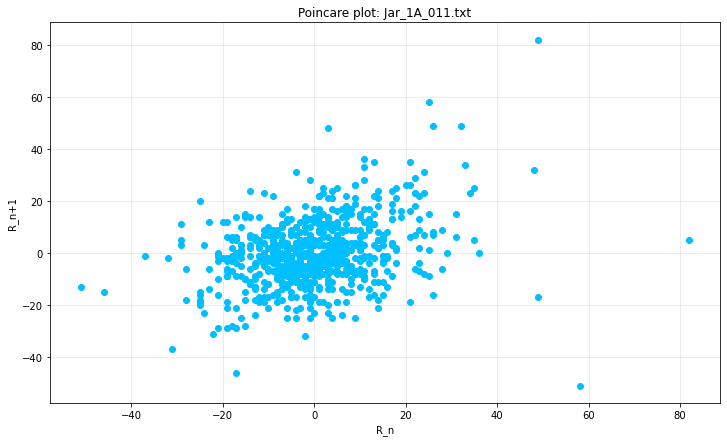

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Jer_ 1A_027.txt


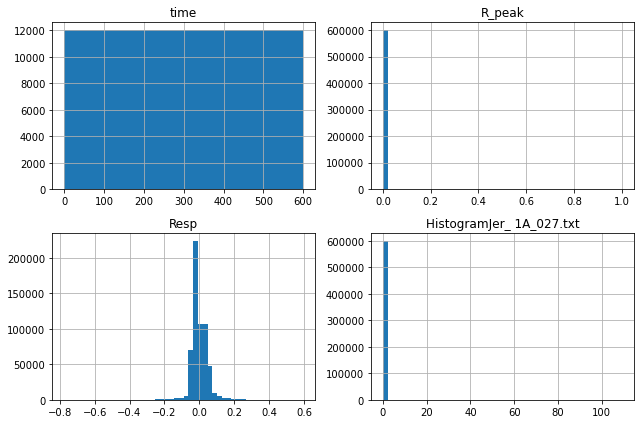

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


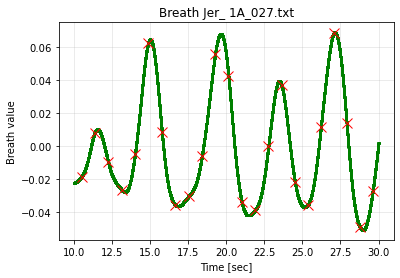

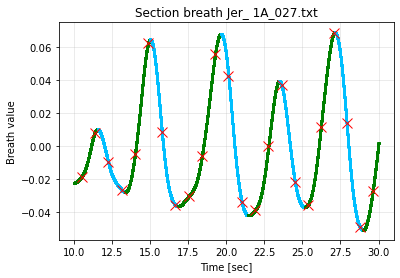

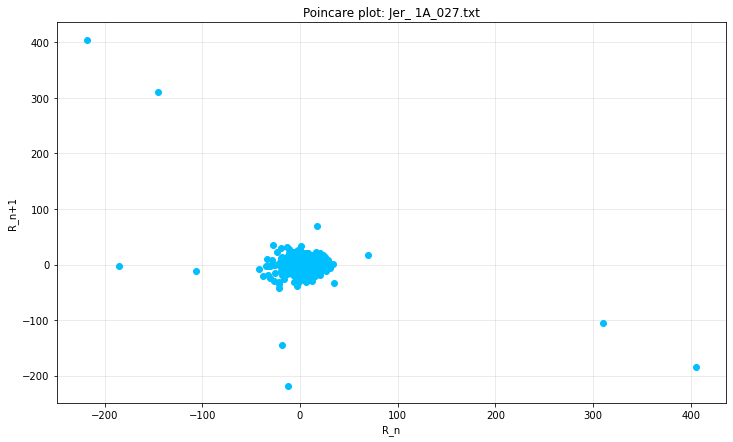

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Jer_1A_014.txt


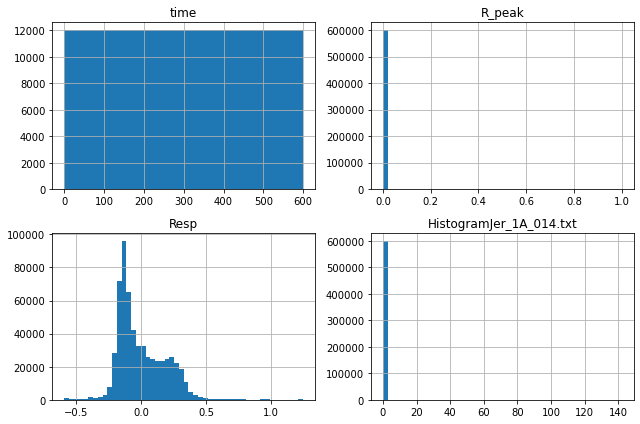

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


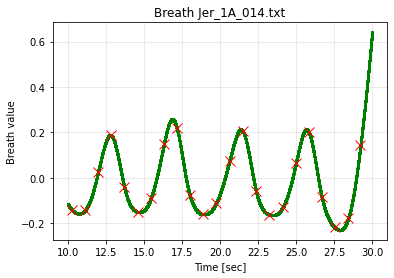

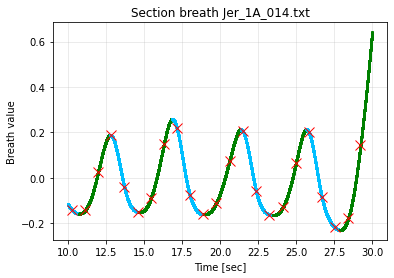

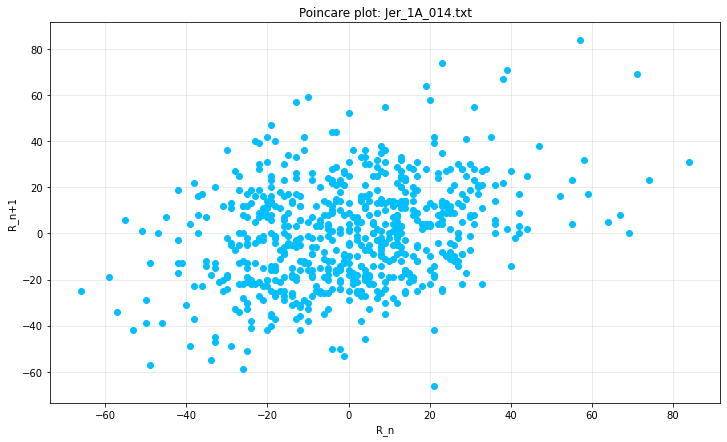

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Jer_2A_010.txt


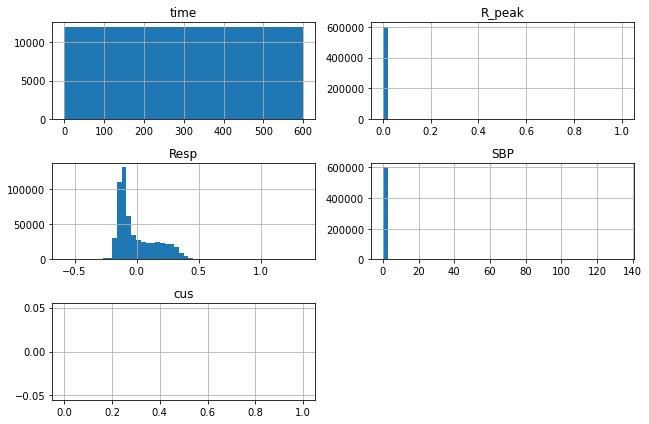

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


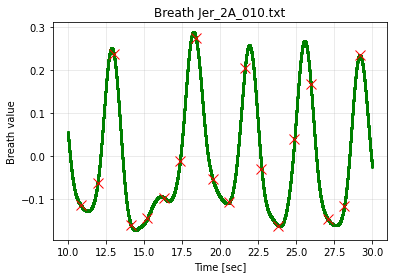

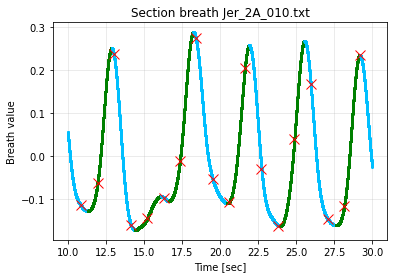

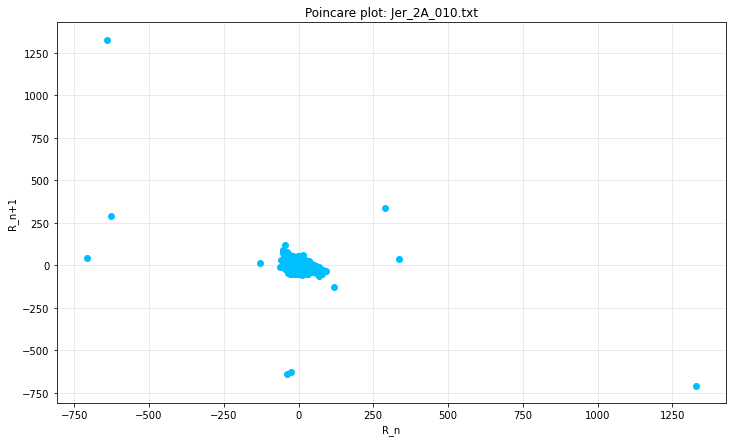

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Jer_2B_010.txt


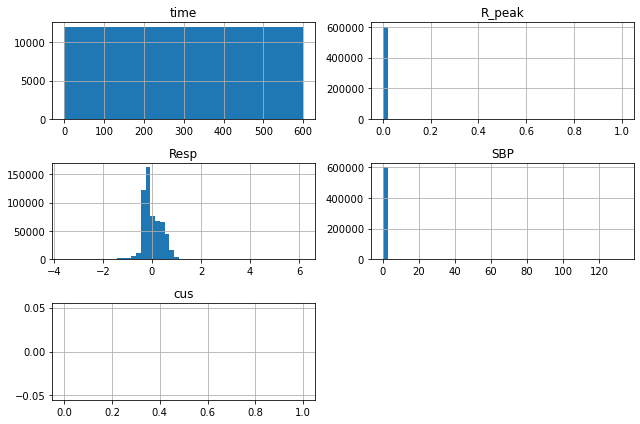

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


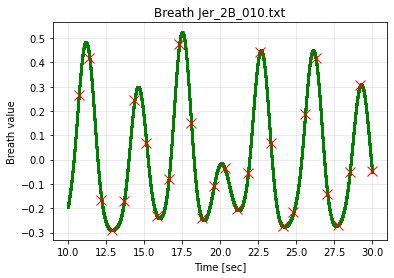

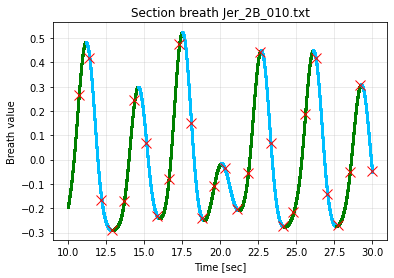

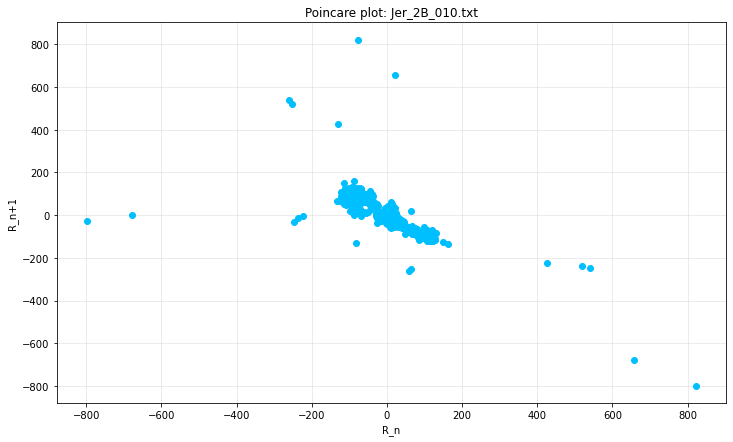

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Joa_1A_012.txt


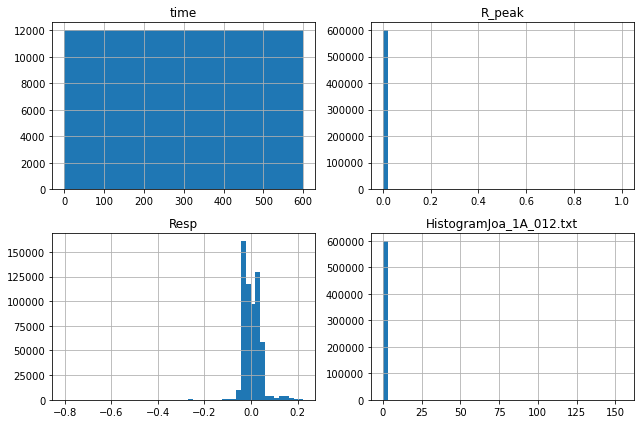

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


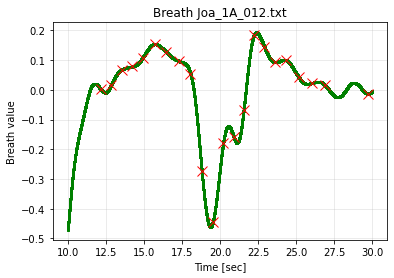

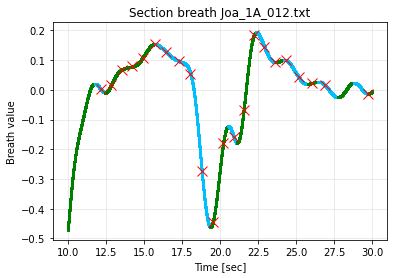

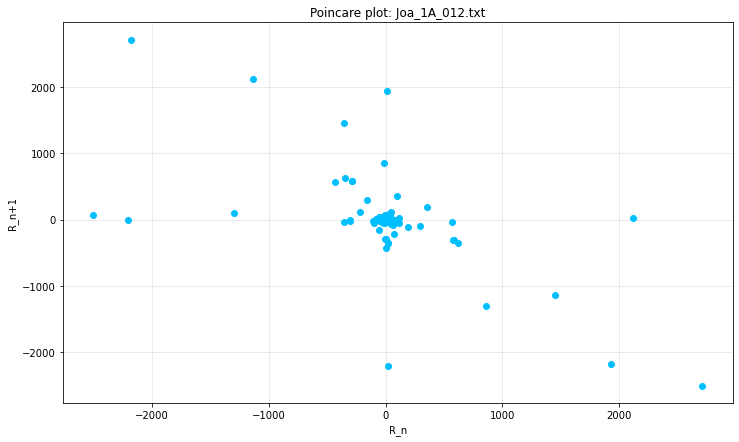

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Jol_1A_008.txt


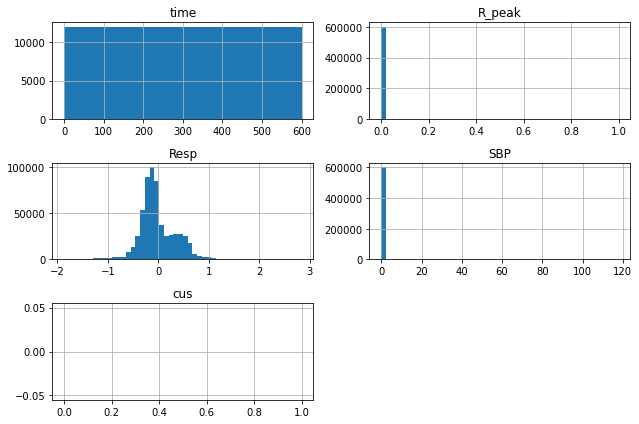

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


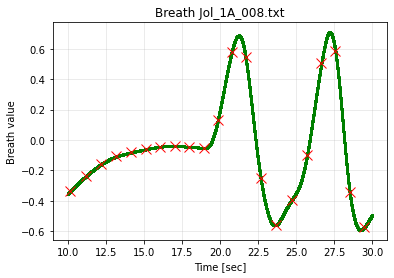

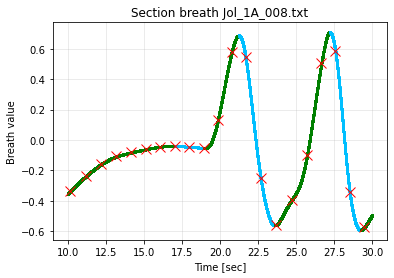

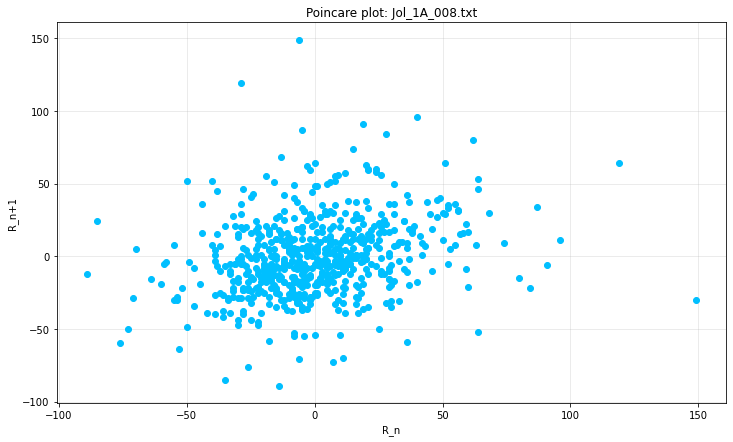

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Jol_1A_023.txt


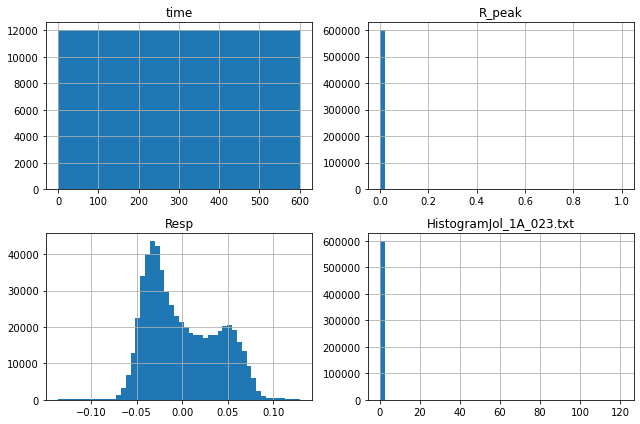

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


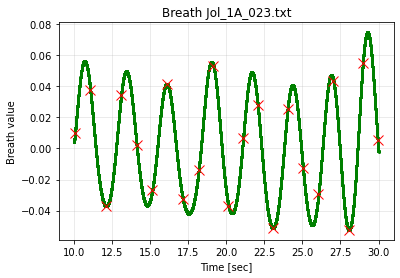

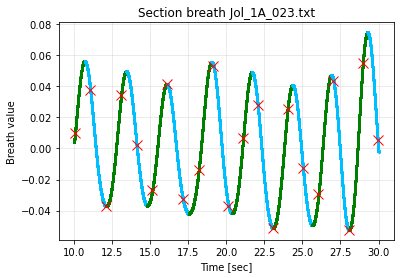

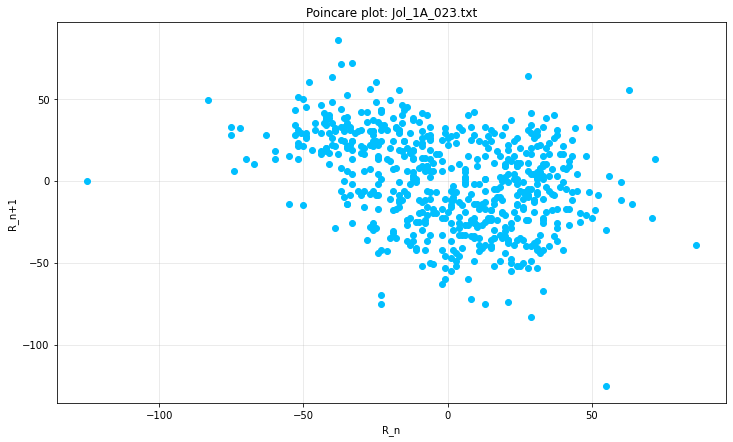

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Jul_1B_002.txt


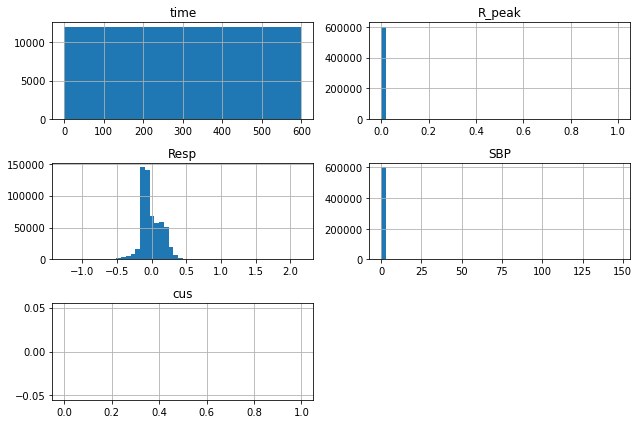

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


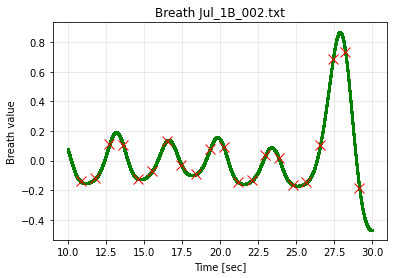

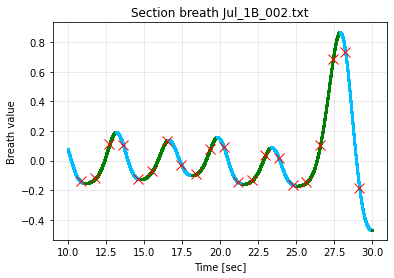

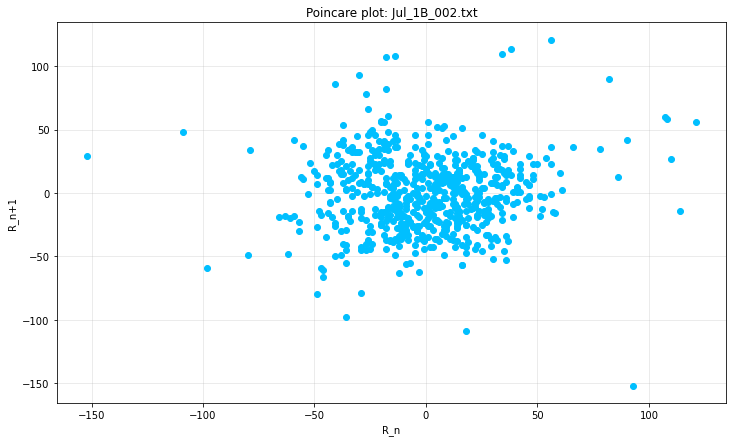

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Jul_2C_002.txt


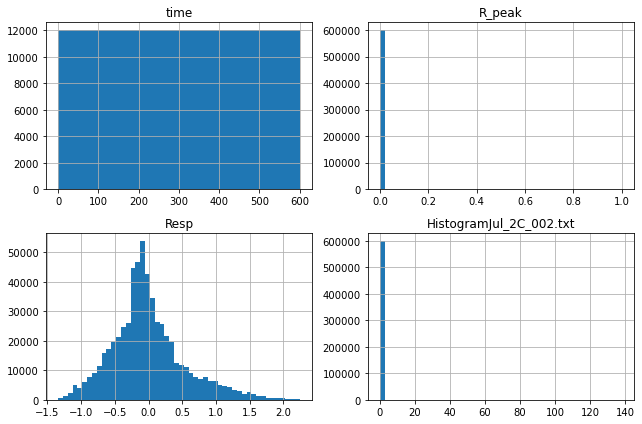

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


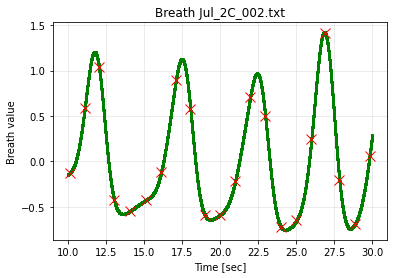

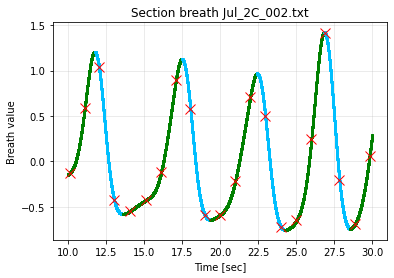

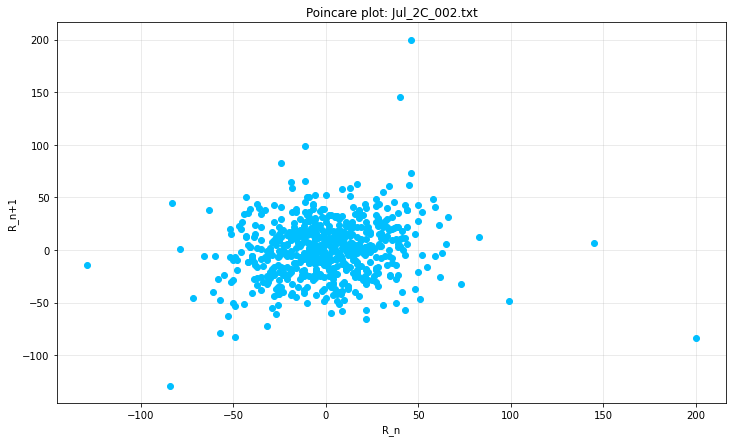

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Kaz_2A_022.txt


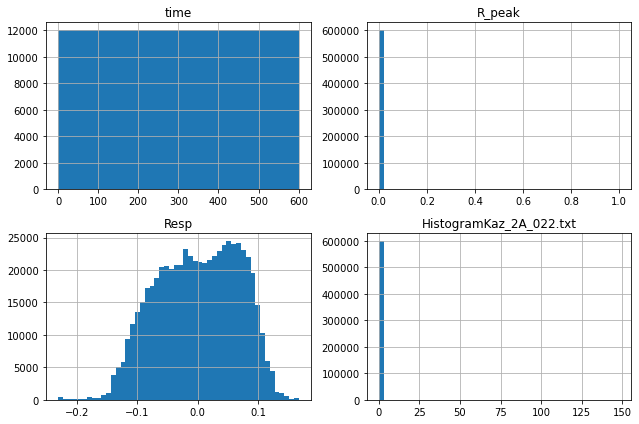

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


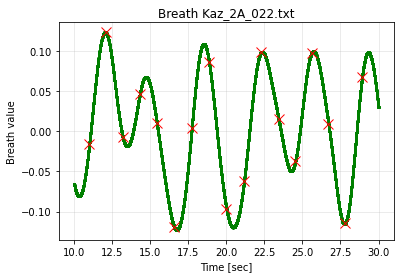

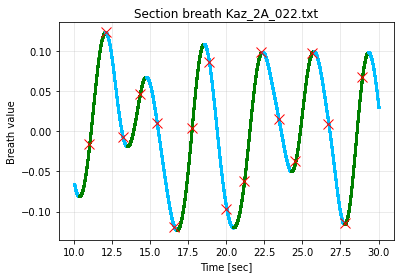

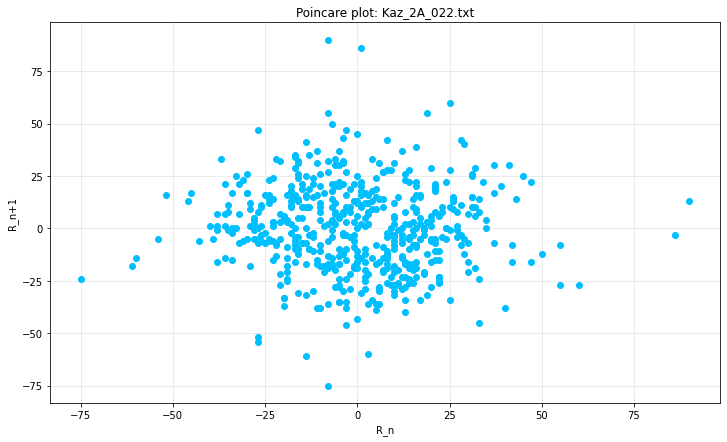

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Kry_2B_019.txt


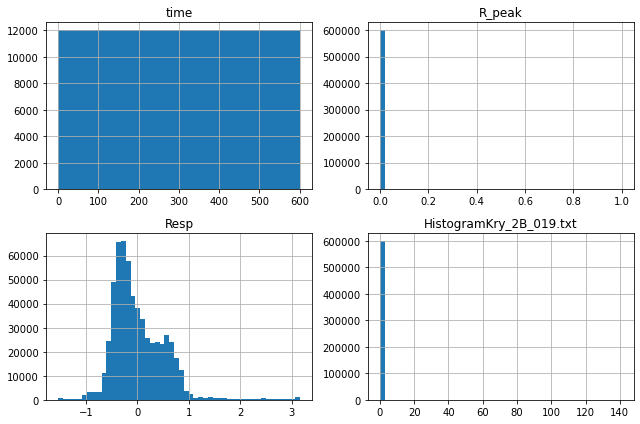

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


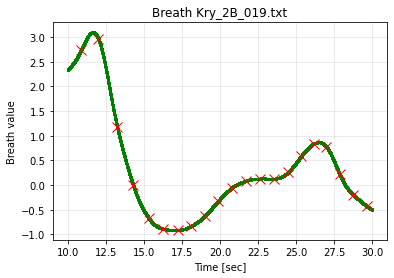

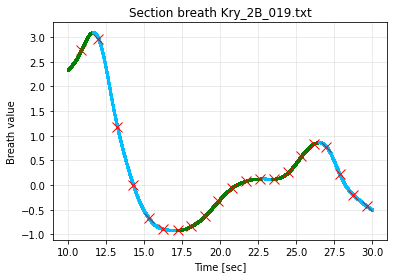

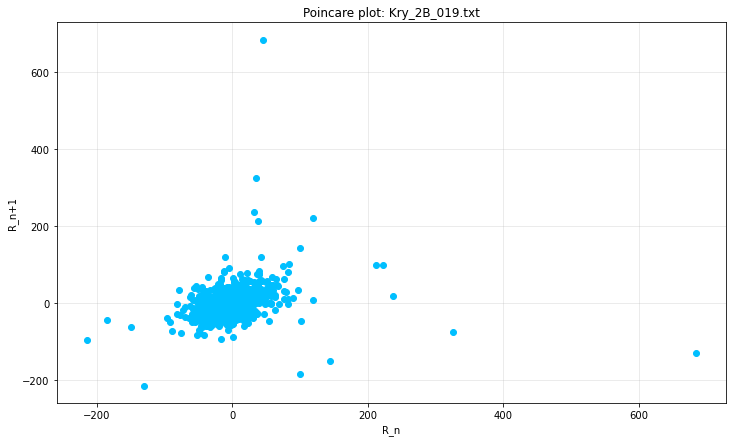

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Krz_2A_012.txt


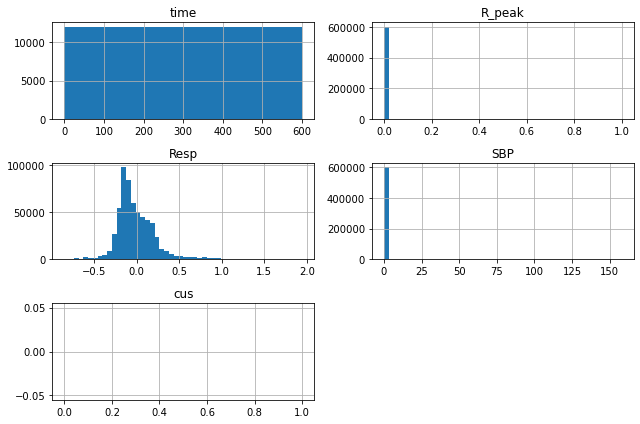

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


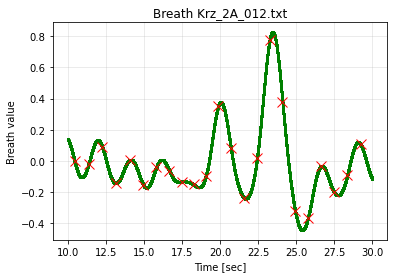

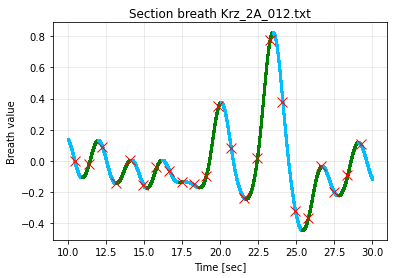

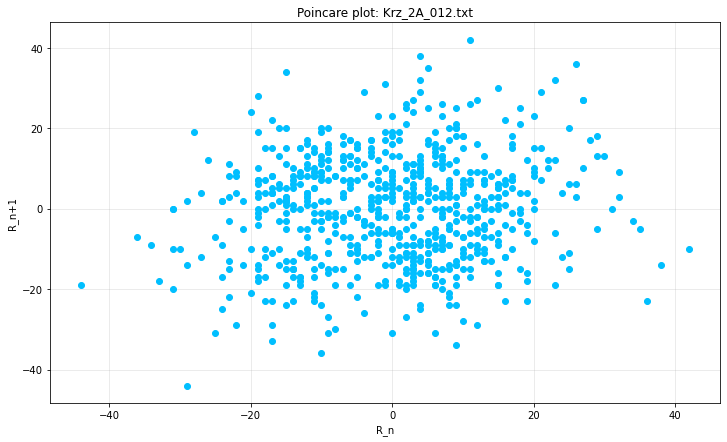

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Lui_2A_020.txt


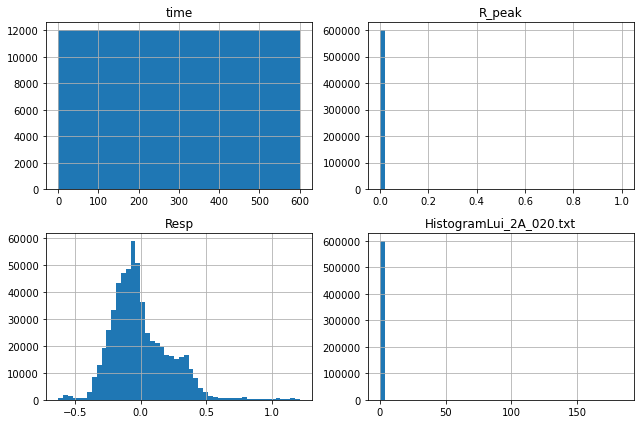

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


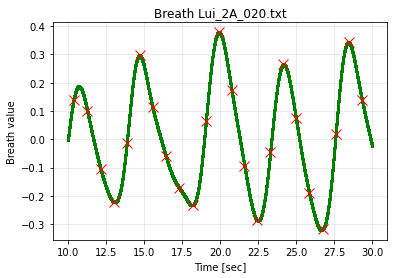

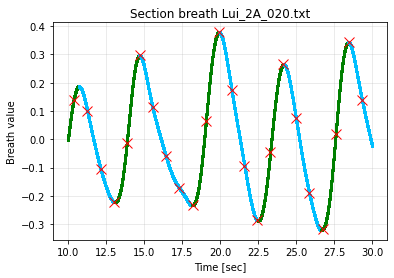

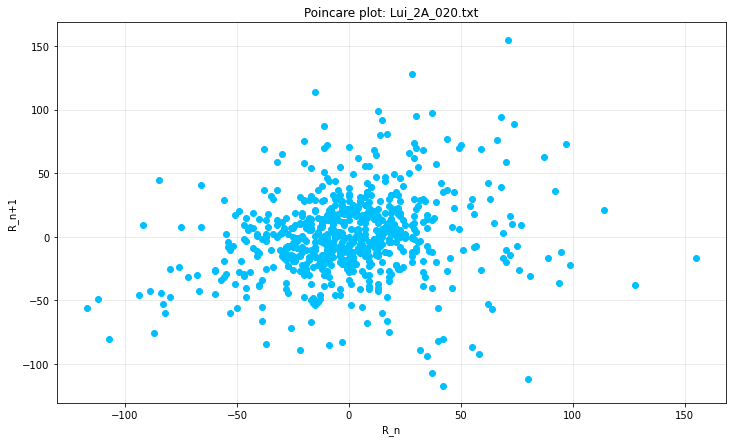

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Luk_1A_010.txt


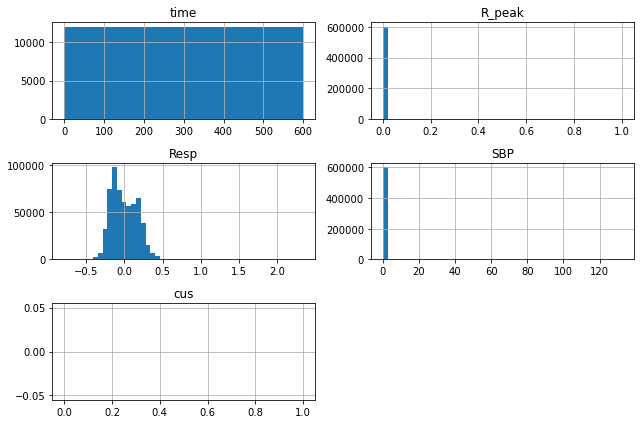

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


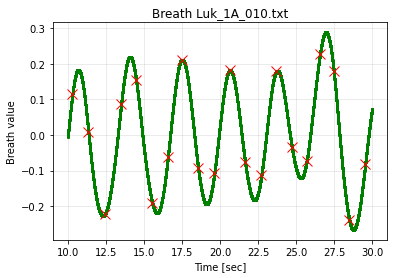

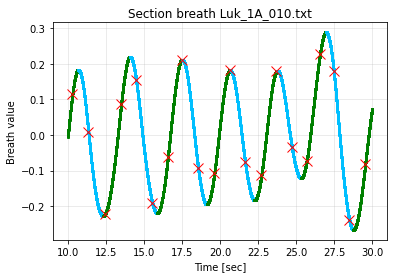

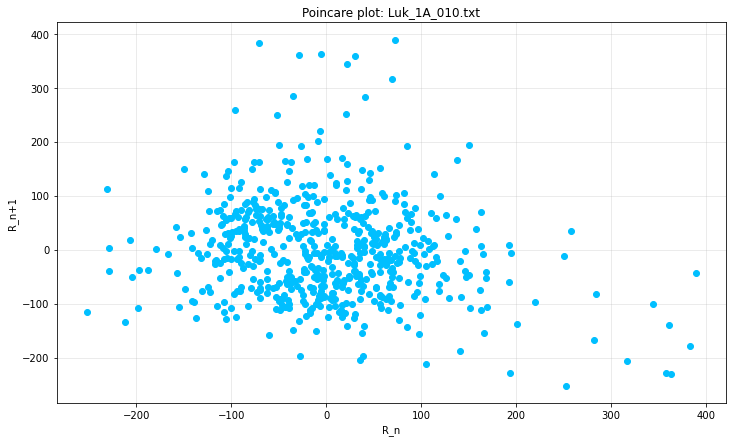

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Luk_2A_002.txt


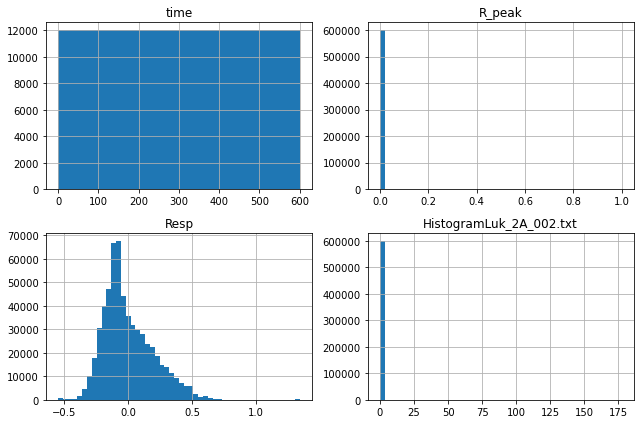

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


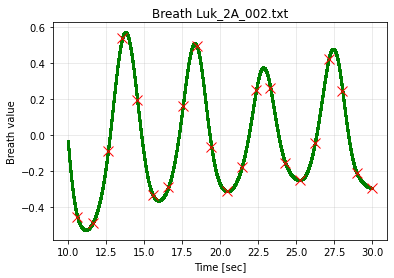

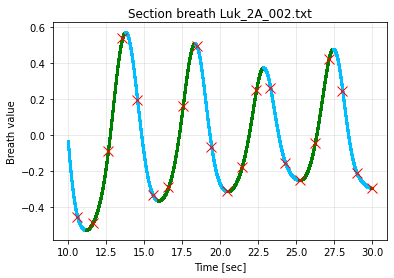

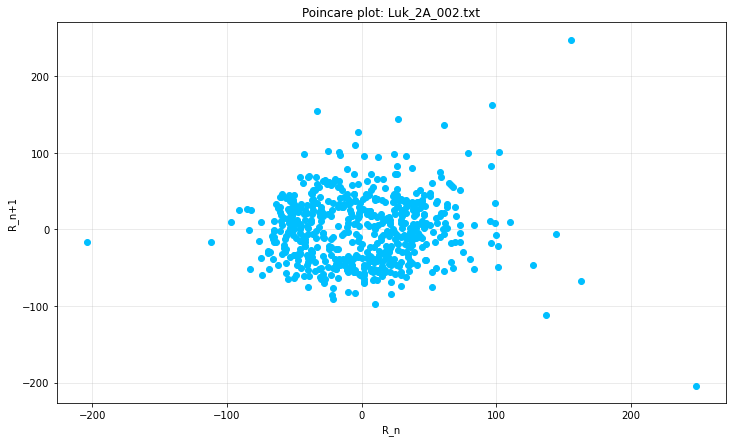

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Mar_1A_002.txt


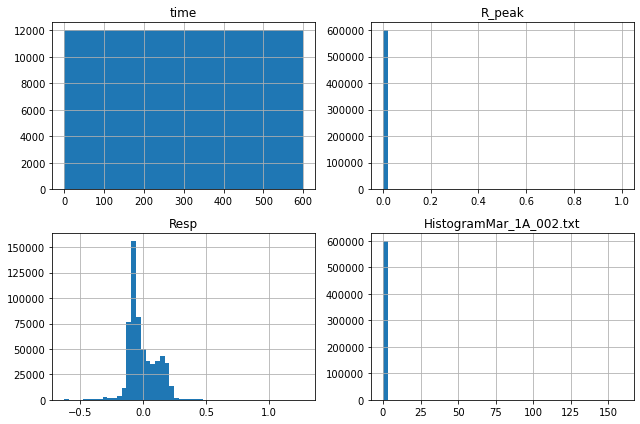

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


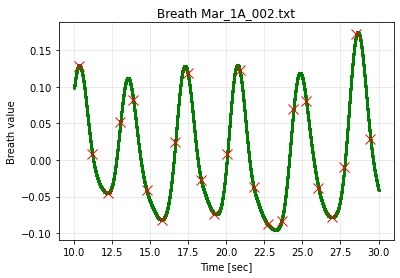

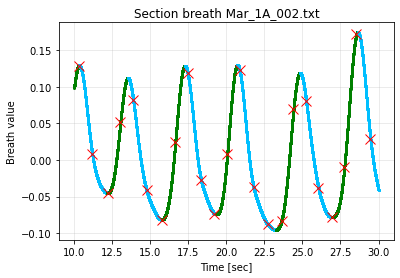

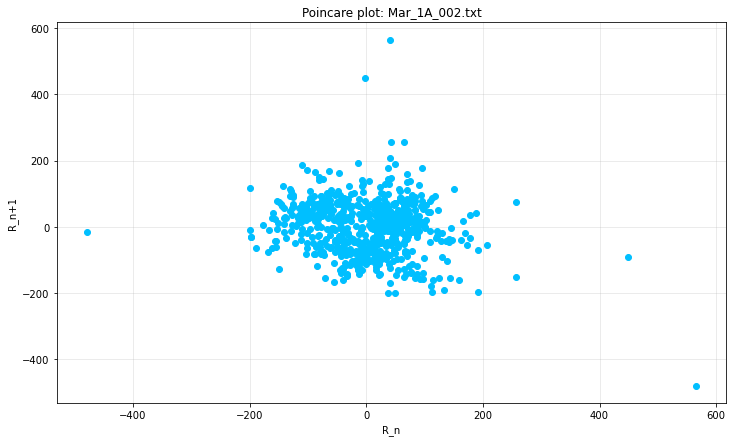

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Mar_2A_005.txt


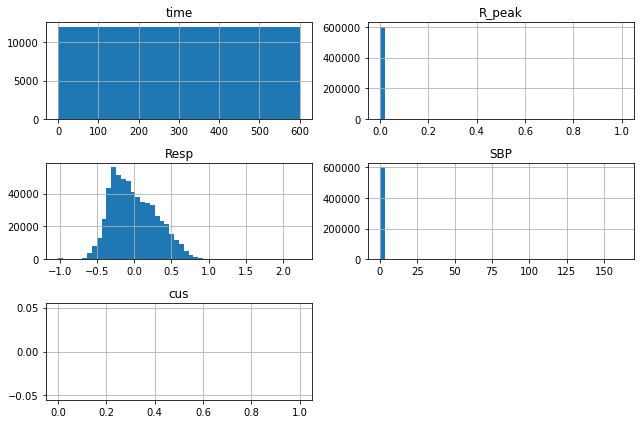

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


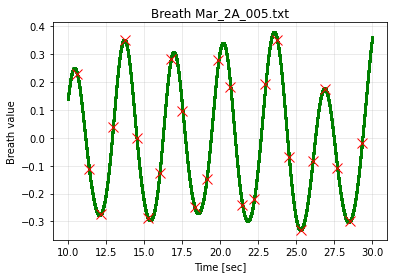

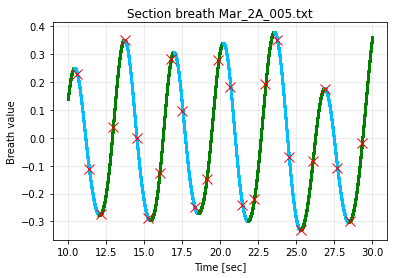

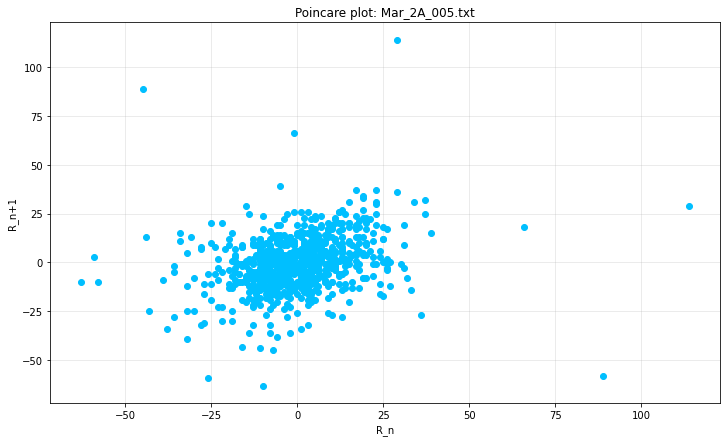

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Mar_2A_019.txt


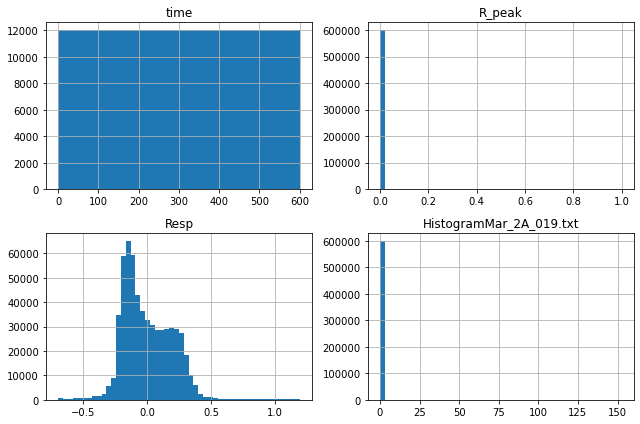

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


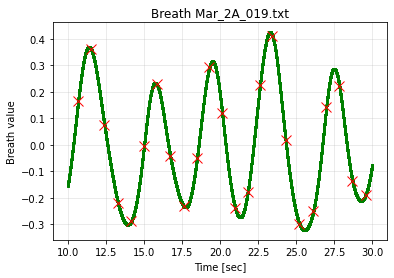

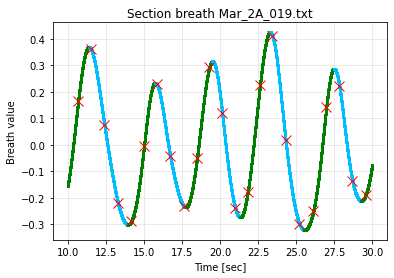

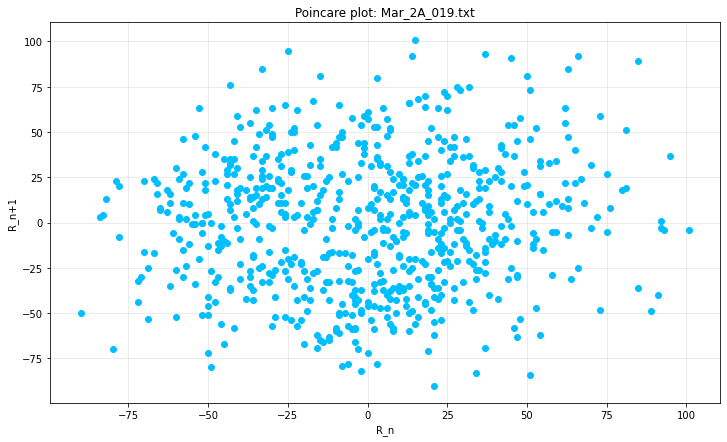

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Mar_2B_018.txt


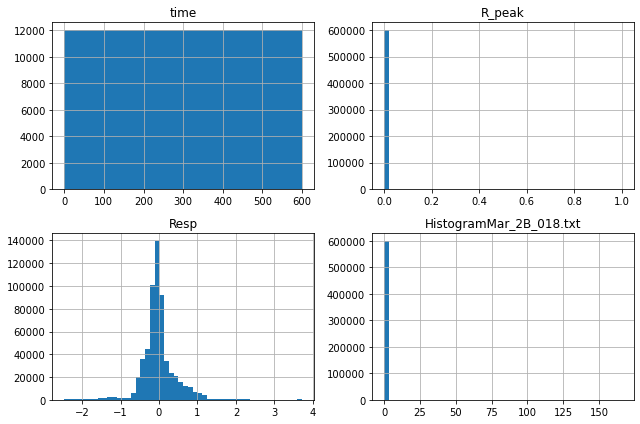

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


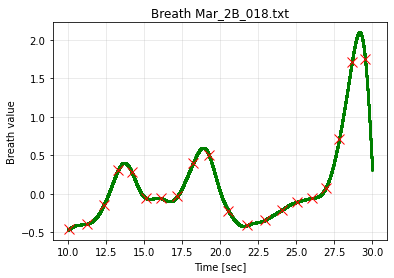

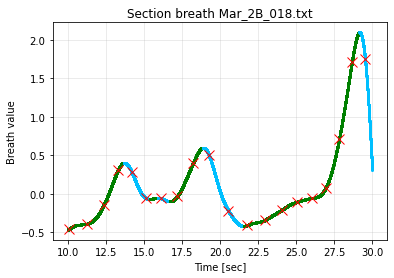

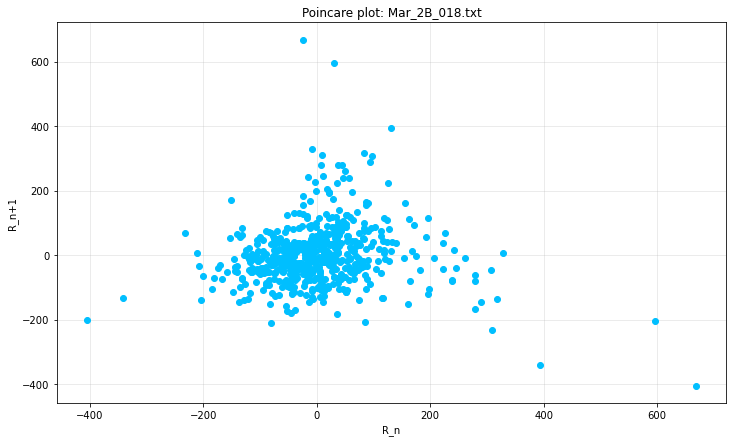

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Mic_2A_003.txt


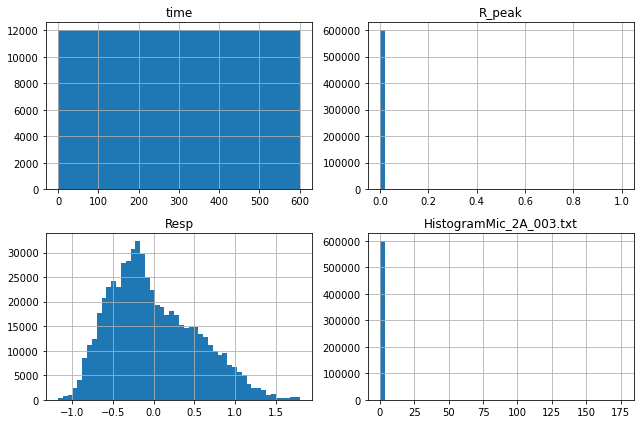

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


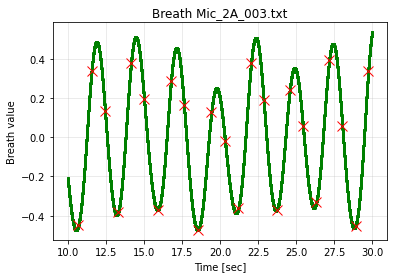

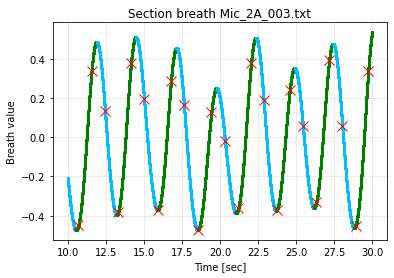

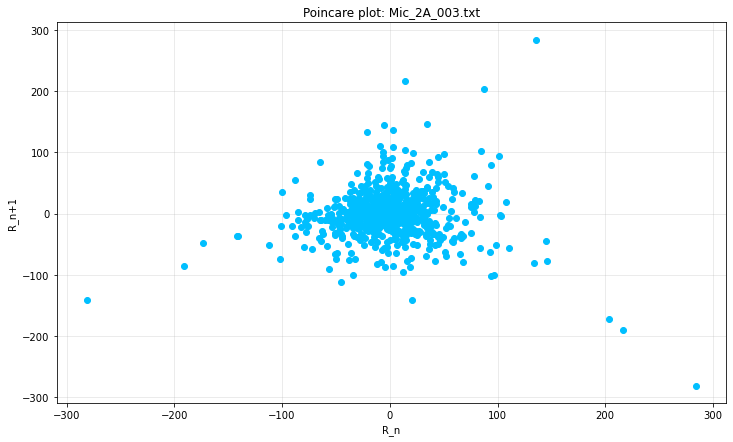

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Mic_2B_001.txt


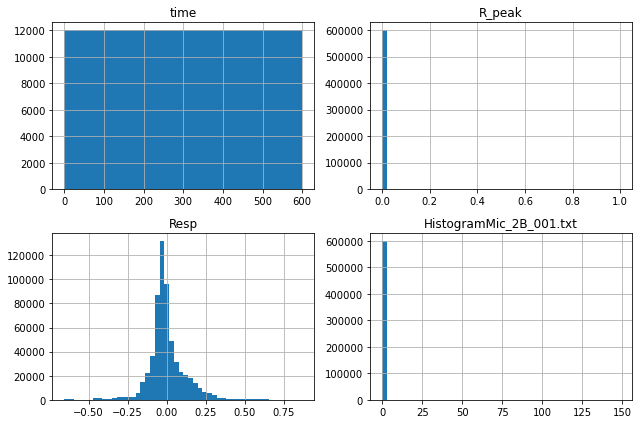

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


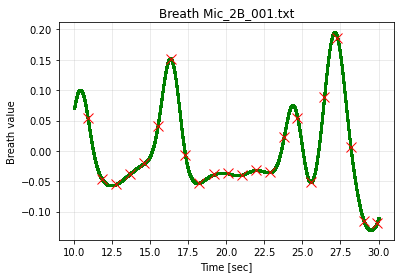

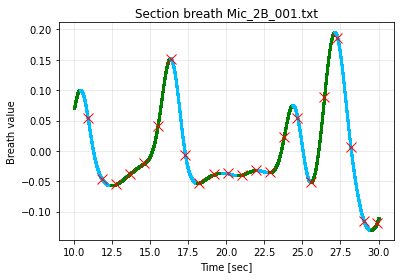

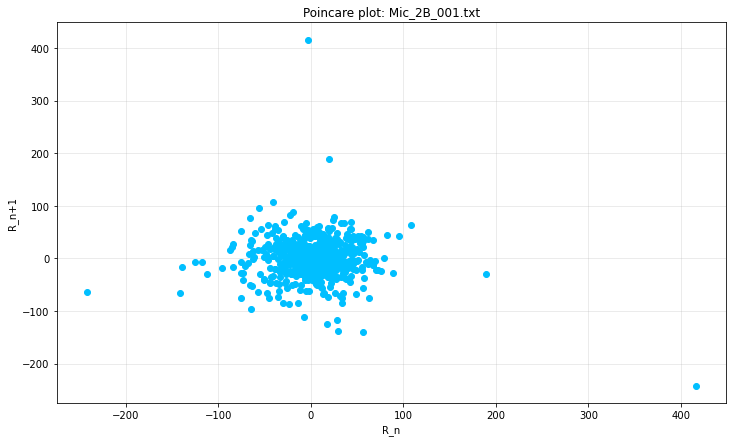

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Nor_2B_012.txt


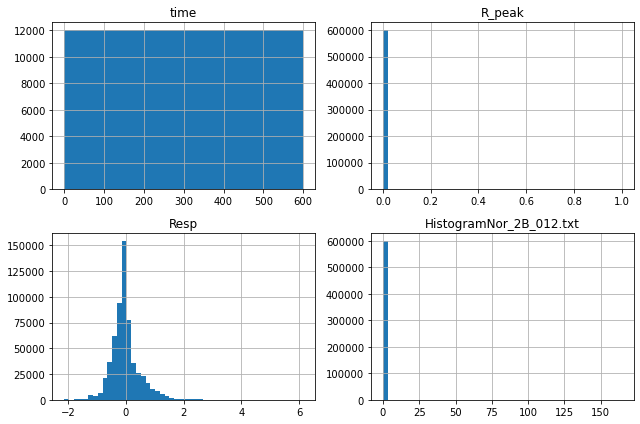

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


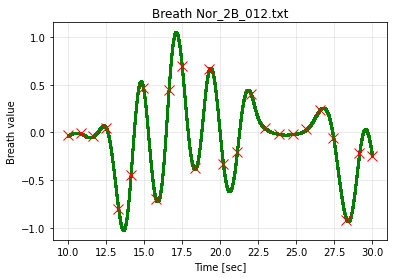

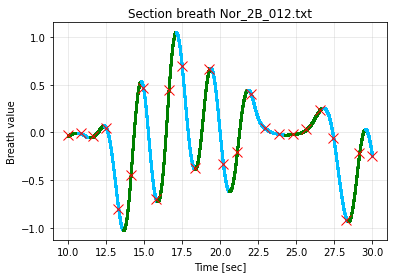

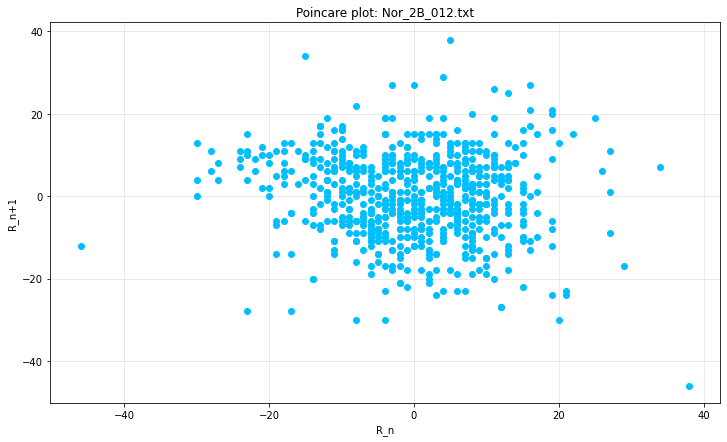

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Paw_1A_013.txt


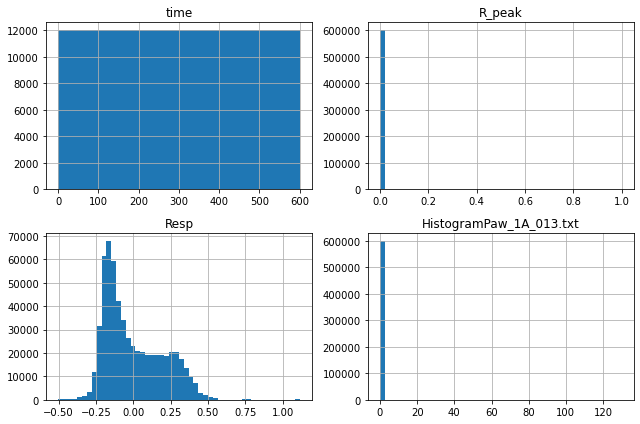

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


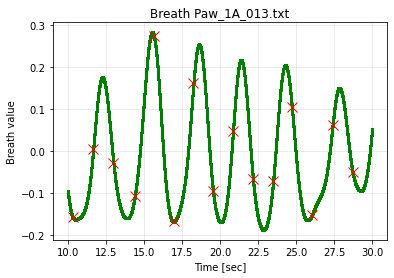

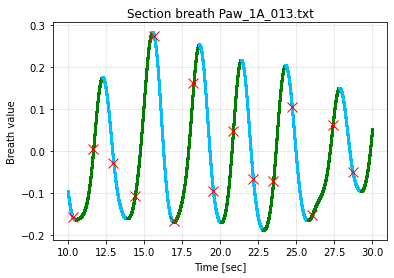

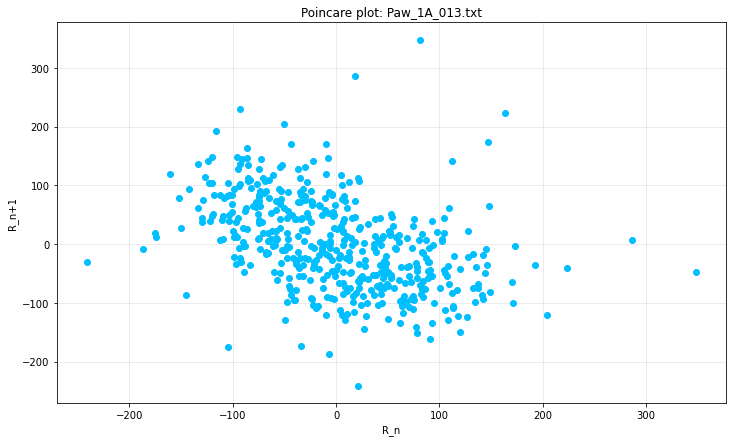

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Paw_2B_002.txt


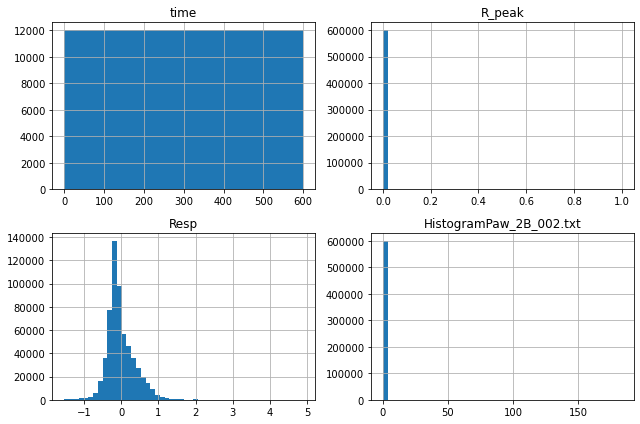

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


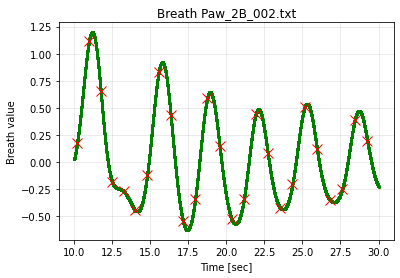

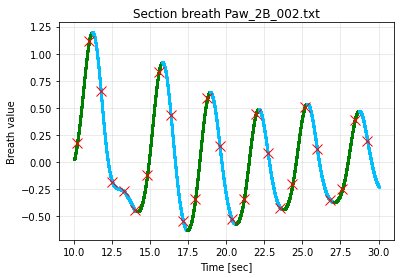

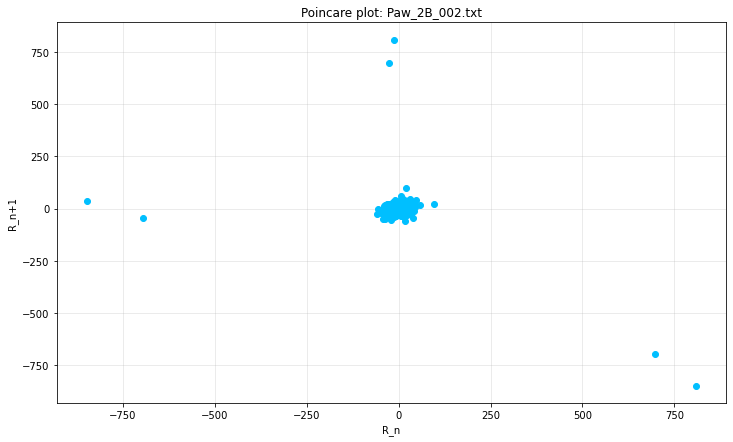

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Paw_2B_004.txt


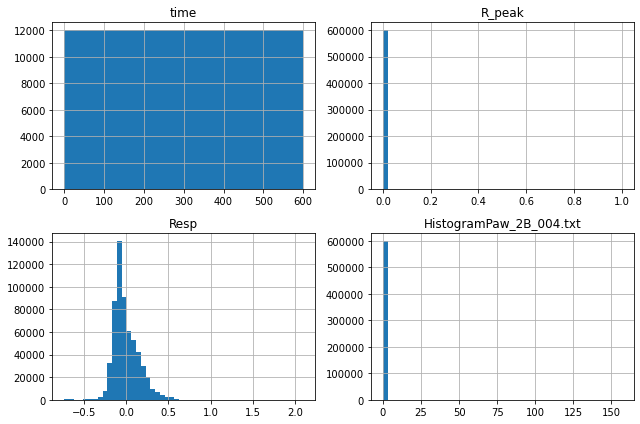

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


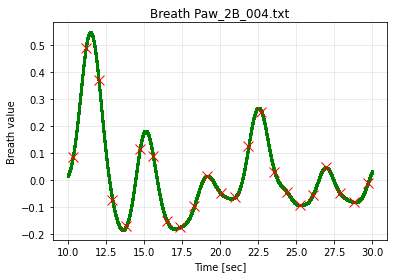

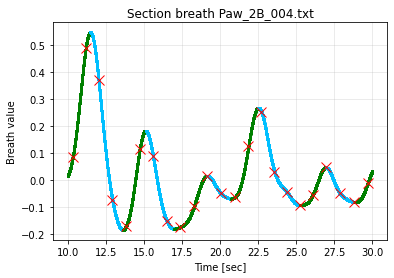

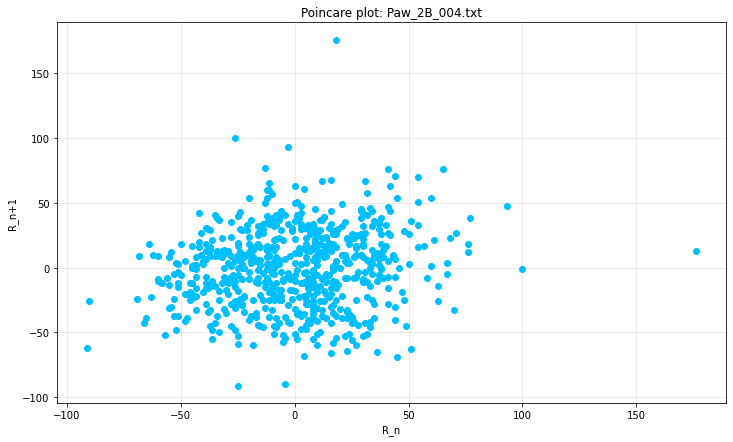

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Rob_1A_001.txt


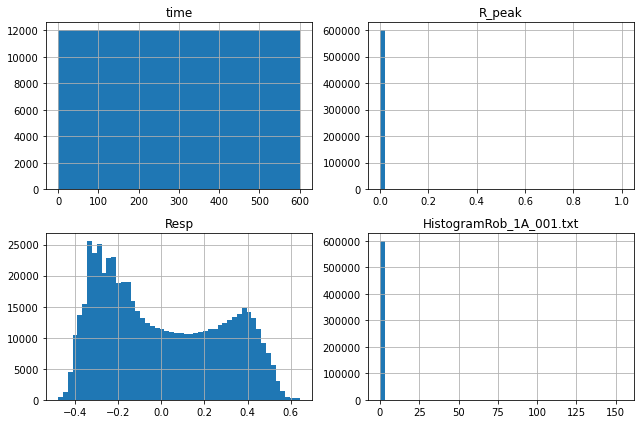

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


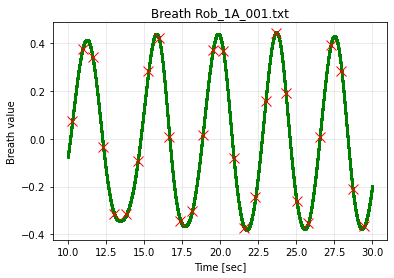

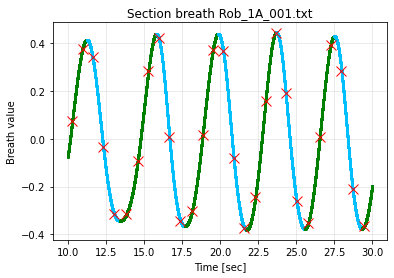

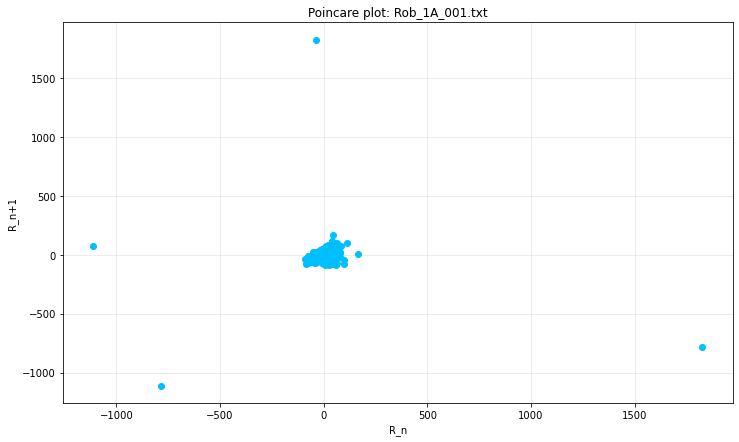

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Rom_1A_030.txt


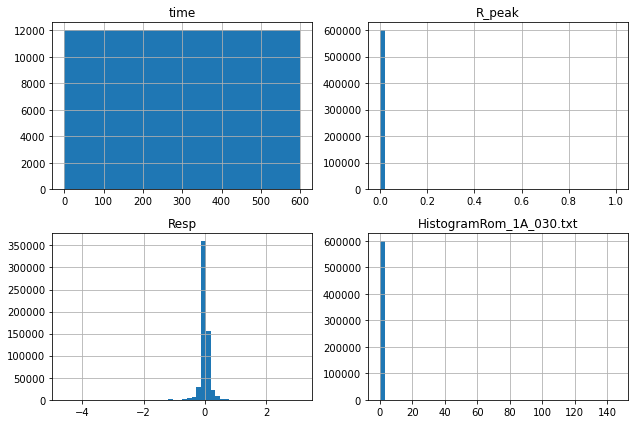

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


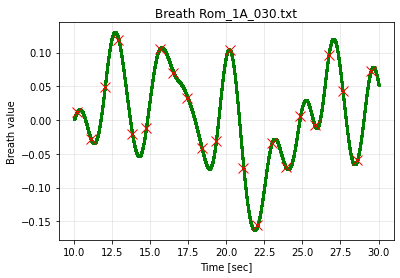

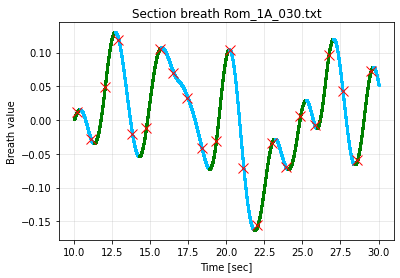

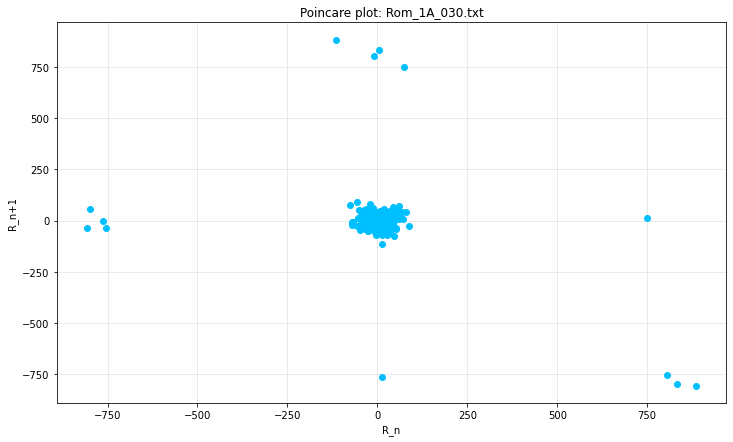

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Ste_2A_011.txt


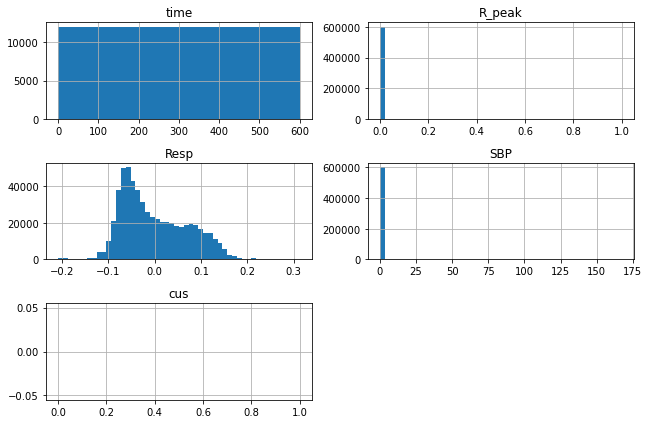

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


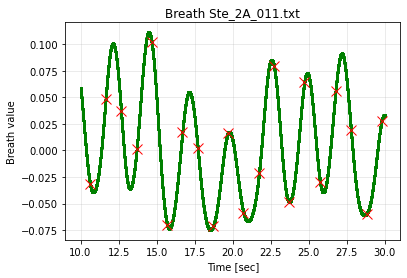

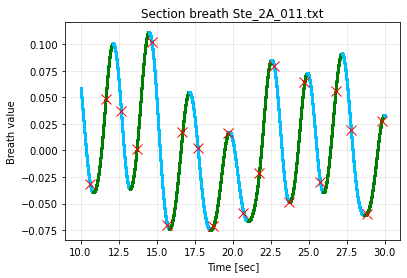

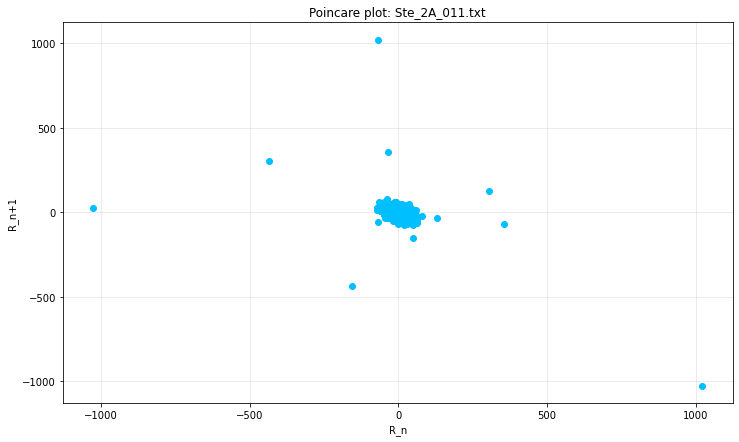

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Ter_2A_009.txt


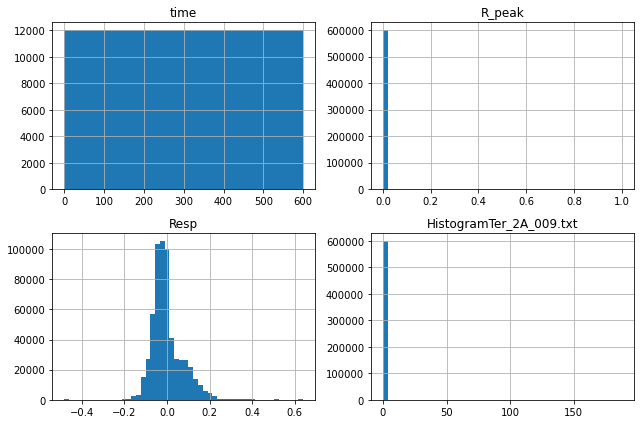

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


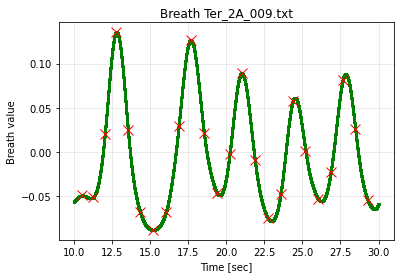

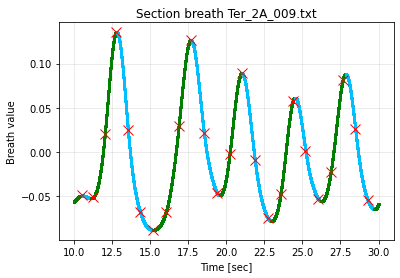

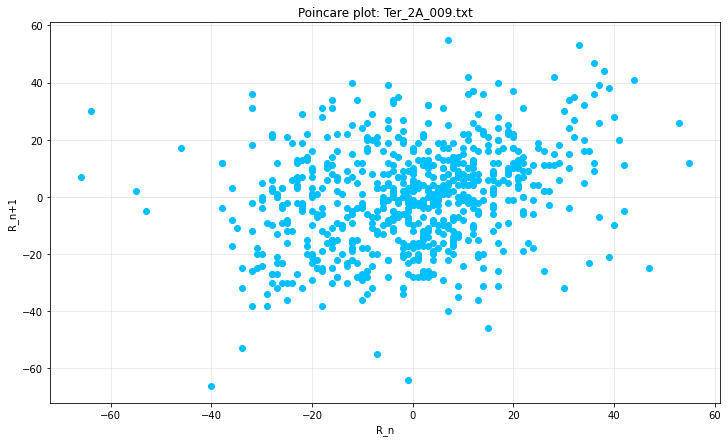

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Tom_1A_003.txt


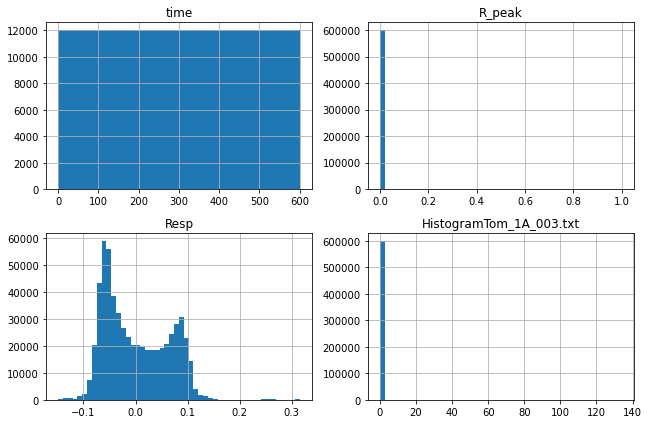

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


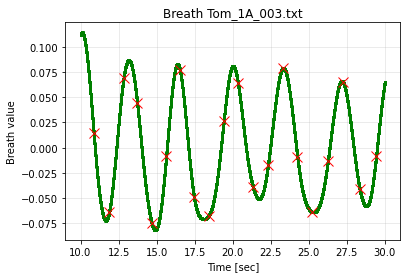

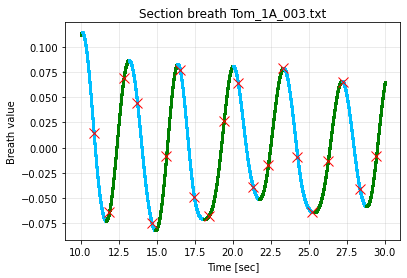

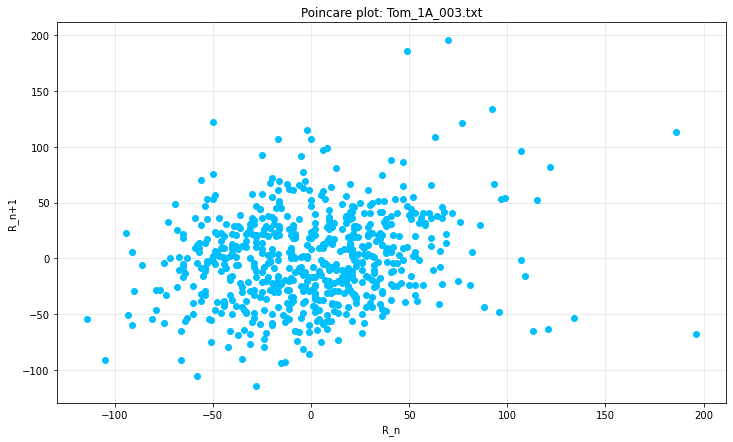

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Urs_2A_021.txt


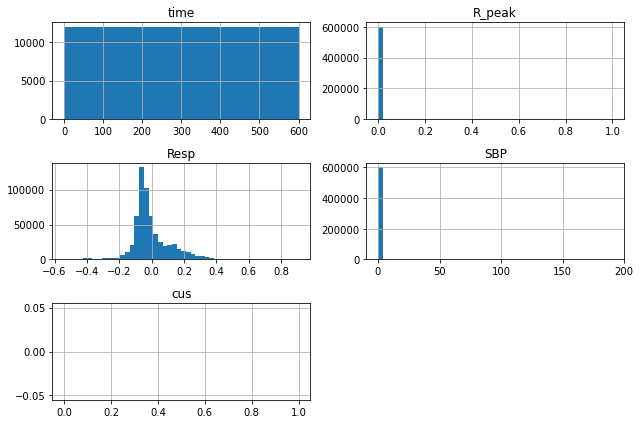

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


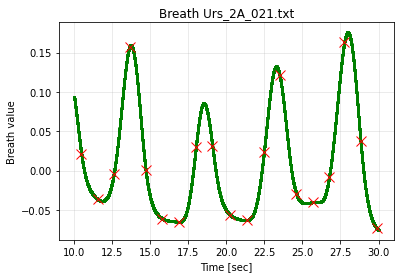

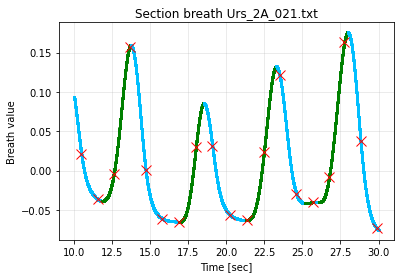

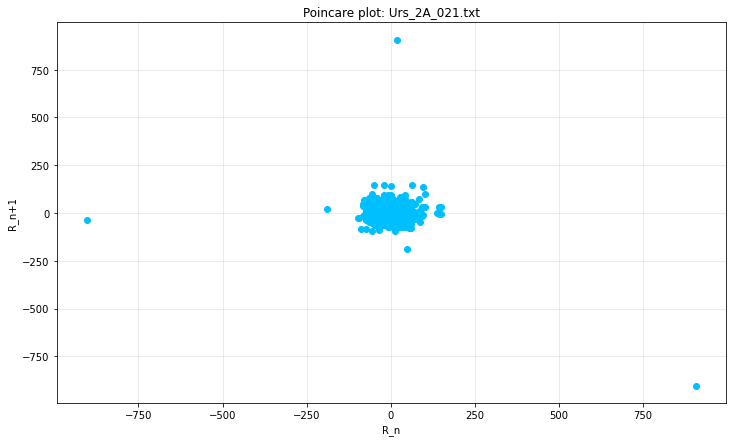

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Zbi_2A_008.txt


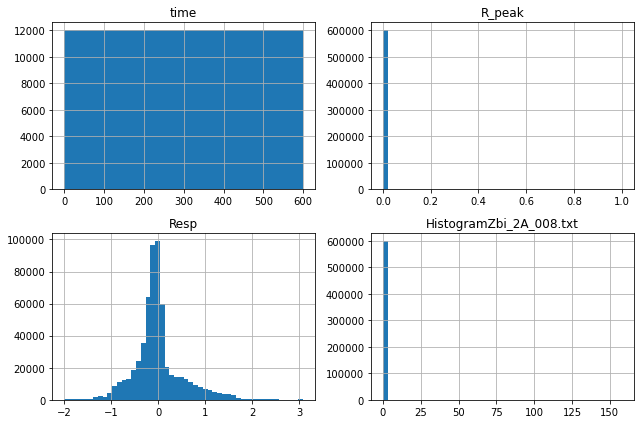

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


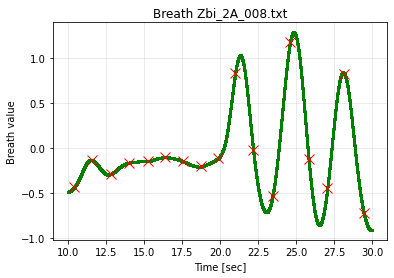

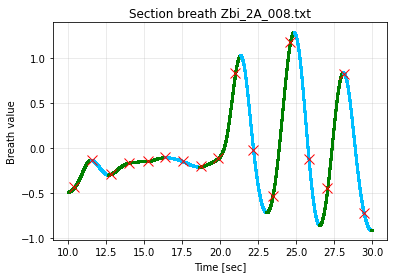

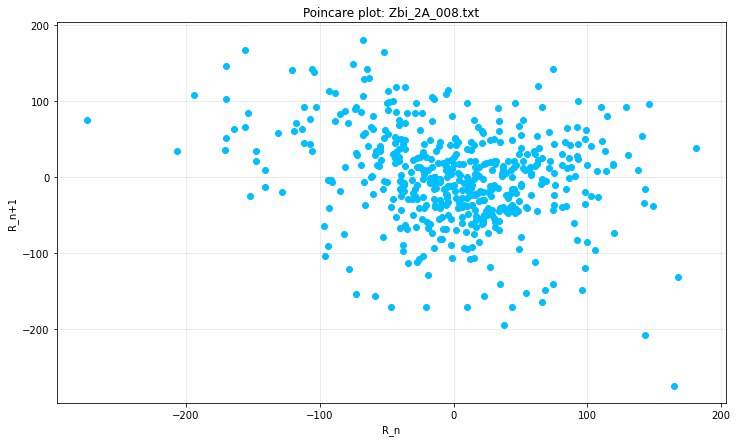

C:\Users\pstrz\Sieci Neuronowe\SN_PROJ_HYPERTENSION\data Zbi_2A_016.txt


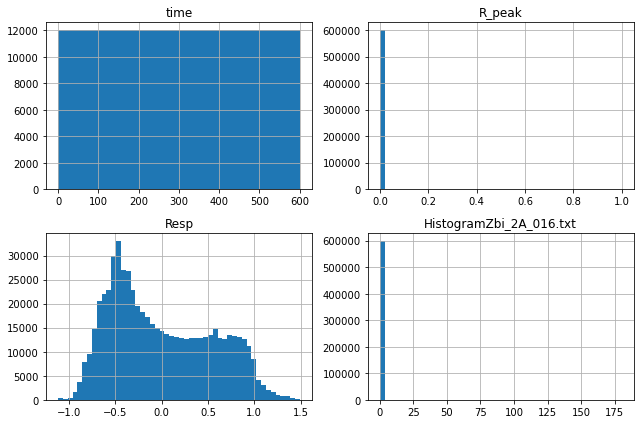

C:\Users\pstrz\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


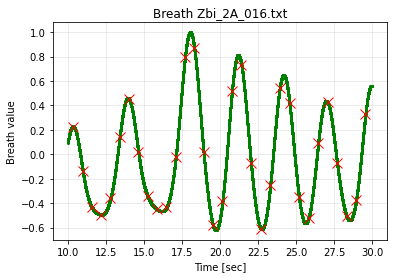

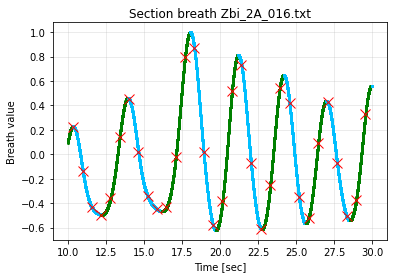

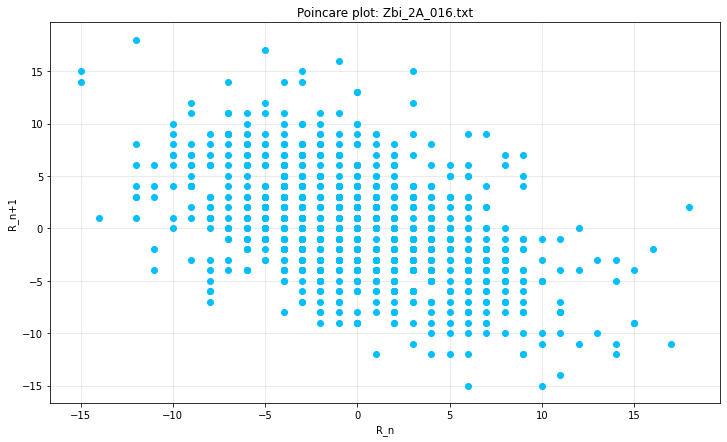

In [62]:
make_excel_dataset()

In [63]:
def get_data_from_excel():
    df = pd.read_csv('Hypertension_dataset.csv')
    return df

In [64]:
df = get_data_from_excel()
df

SDNN      RMSSD     pNN50     pNN20    SBP_mean  counter_in  \
0   52.324437  32.080966  0.056522  0.233333  129.247628    0.543353   
1   40.166414  30.713029  0.010363  0.067358  107.147034    0.492255   
2   37.665435  30.466353  0.037908  0.247059  139.008217    0.530639   
3   64.031500  37.172742  0.069057  0.245684  120.831911    0.569536   
4   45.060980  32.435503  0.031674  0.300151  130.497630    0.515789   
..        ...        ...       ...       ...         ...         ...   
57  42.067566  17.786552  0.002857  0.124286  144.699603    0.511396   
58  68.792215  40.740101  0.095462  0.311424  109.358120    0.499220   
59  69.002551  67.320247  0.094241  0.310646  155.832799    0.532174   
60  71.546798  63.512185  0.190381  0.364729  125.607306    0.477046   
61   7.941125   5.061361  0.000000  0.000000  157.177411    0.469556   

    counter_out    acc_in    dec_in   acc_out   dec_out   incr_in   decr_in  \
0      0.456647  0.194203  0.266667  0.211594  0.166667  0.215630  0.299566   
1      0.507745  0.091537  0.136442  0.153713  0.094991  0.166954  0.318417   
2      0.469361  0.130719  0.343791  0.334641  0.074510  0.165796  0.348564   
3      0.430464  0.269588  0.250996  0.191235  0.166003  0.298013  0.243709   
4      0.484211  0.134238  0.334842  0.294118  0.125189  0.311350  0.151840   
..          ...       ...       ...       ...       ...       ...       ...   
57     0.488604  0.110000  0.251429  0.252857  0.085714  0.174286  0.294286   
58     0.500780  0.183099  0.247261  0.239437  0.190923  0.276131  0.212168   
59     0.467826  0.164049  0.268761  0.240838  0.139616  0.127178  0.365854   
60     0.522954  0.180361  0.214429  0.238477  0.192385  0.186000  0.274000   
61     0.530444  0.131334  0.134436  0.144778  0.157187  0.126935  0.315789   

    incr_out  decr_out   label  
0   0.260492  0.219971  zdrowy  
1   0.266781  0.197935   chory  
2   0.295039  0.173629  zdrowy  
3   0.223841  0.218543   chory  
4   0.150307  0.320552  zdrowy  
..       ...       ...     ...  
57  0.241429  0.222857   chory  
58  0.209048  0.301092  zdrowy  
59  0.271777  0.160279   chory  
60  0.236000  0.298000   chory  
61  0.314757  0.148607   chory  

[62 rows x 16 columns]

In [65]:
df_healthy = df[(df['label'] == 'zdrowy')]
df_sick = df[(df['label'] == 'chory')]

In [66]:
df_healthy

SDNN       RMSSD     pNN50     pNN20    SBP_mean  counter_in  \
0    52.324437   32.080966  0.056522  0.233333  129.247628    0.543353   
2    37.665435   30.466353  0.037908  0.247059  139.008217    0.530639   
4    45.060980   32.435503  0.031674  0.300151  130.497630    0.515789   
11   35.388412   25.501247  0.017600  0.201600  102.624470    0.569378   
12   45.221170   29.902708  0.047688  0.241329  128.313246    0.547550   
13   70.832552   69.484580  0.181552  0.383602  118.136982    0.527007   
15   25.809093   30.138158  0.018587  0.334572  104.280038    0.472222   
19   48.865845   36.510847  0.060559  0.327640  122.235226    0.475232   
21   65.076780   45.386063  0.131579  0.357585  121.250468    0.501543   
23   87.680121   86.761883  0.246679  0.383302   99.520709    0.500945   
24   35.656649   18.878241  0.004511  0.135338  113.974011    0.497751   
25   33.282611   17.866243  0.008444  0.096502  115.136100    0.527076   
28   34.417215   12.749336  0.002721  0.062585  128.269829    0.552239   
29   23.668895   25.445389  0.004292  0.030043   90.469075    0.553495   
30   37.274299   21.891967  0.017910  0.174627  118.096675    0.562500   
33  175.784412  230.287341  0.027778  0.119048  129.283444    0.472296   
34   39.821335   27.490544  0.049521  0.191693  101.282358    0.670382   
35   35.546120   28.935906  0.019769  0.298188   99.991500    0.443350   
36   36.364189   30.047679  0.039370  0.236220   96.639040    0.554160   
42   97.350901   91.920074  0.257627  0.389831  114.268894    0.506757   
44   76.131518   82.769551  0.252239  0.447761  137.667801    0.514881   
51   74.330949   78.021311  0.260417  0.379167  113.096605    0.572614   
54   86.101272   85.795768  0.044944  0.223471  136.305163    0.536737   
55   90.599062   92.462771  0.029687  0.164062  117.290536    0.524922   
58   68.792215   40.740101  0.095462  0.311424  109.358120    0.499220   

    counter_out    acc_in    dec_in   acc_out   dec_out   incr_in   decr_in  \
0      0.456647  0.194203  0.266667  0.211594  0.166667  0.215630  0.299566   
2      0.469361  0.130719  0.343791  0.334641  0.074510  0.165796  0.348564   
4      0.484211  0.134238  0.334842  0.294118  0.125189  0.311350  0.151840   
11     0.430622  0.171200  0.248000  0.236800  0.104000  0.174400  0.259200   
12     0.452450  0.167630  0.306358  0.255780  0.117052  0.188761  0.312680   
13     0.472993  0.190337  0.307467  0.276720  0.136164  0.227606  0.236417   
15     0.527778  0.059480  0.336431  0.353160  0.063197  0.208255  0.225141   
19     0.524768  0.110248  0.305901  0.355590  0.108696  0.251163  0.212403   
21     0.498457  0.150155  0.294118  0.332817  0.125387  0.282844  0.165379   
23     0.499055  0.168880  0.284630  0.271347  0.172676  0.304348  0.200378   
24     0.502249  0.085714  0.306767  0.309774  0.063158  0.190405  0.257871   
25     0.472924  0.084439  0.334138  0.297949  0.077201  0.110169  0.400726   
28     0.447761  0.130612  0.227211  0.185034  0.099320  0.165761  0.406250   
29     0.446505  0.072961  0.198856  0.180258  0.070100  0.129794  0.269912   
30     0.437500  0.177612  0.244776  0.202985  0.153731  0.182635  0.375749   
33     0.527704  0.121693  0.247354  0.250000  0.146825  0.287779  0.170828   
34     0.329618  0.166134  0.325879  0.185304  0.091054  0.180223  0.416268   
35     0.556650  0.130148  0.199341  0.304778  0.191104  0.264463  0.200000   
36     0.445840  0.198425  0.240945  0.204724  0.170079  0.267296  0.298742   
42     0.493243  0.137288  0.320339  0.300000  0.171186  0.270270  0.153716   
44     0.485119  0.141791  0.352239  0.368657  0.083582  0.214286  0.230655   
51     0.427386  0.297917  0.202083  0.108333  0.256250  0.333333  0.215190   
54     0.463263  0.139825  0.354557  0.313358  0.086142  0.159402  0.281445   
55     0.475078  0.189062  0.204687  0.182812  0.159375  0.222222  0.247619   
58     0.500780  0.183099  0.247261  0.239437  0.190923  0.276131  0.212168   

    incr_out  decr_out   label

In [67]:
df_sick

SDNN      RMSSD     pNN50     pNN20    SBP_mean  counter_in  \
1    40.166414  30.713029  0.010363  0.067358  107.147034    0.492255   
3    64.031500  37.172742  0.069057  0.245684  120.831911    0.569536   
5    70.808343  85.398038  0.060883  0.272451  171.782362    0.487102   
6    41.012440  53.947454  0.208459  0.252266  146.989067    0.522590   
7    71.274495  73.374129  0.157566  0.318253  120.130023    0.564541   
8    33.505895  23.512739  0.008242  0.226648  165.229831    0.520548   
9    48.686215  47.618329  0.022355  0.220566   70.850131    0.524517   
10   37.892749  18.909272  0.001460  0.135766  150.359516    0.506550   
14   42.047948  23.847663  0.013616  0.130106  130.368717    0.505279   
16   41.819657  57.548359  0.002625  0.009186  120.323932    0.463351   
17   49.833332  33.154655  0.062295  0.260656  109.324554    0.506536   
18   36.973746  41.913208  0.103704  0.280000  141.159271    0.502216   
20   83.976853  59.883114  0.056782  0.268139  124.946509    0.522013   
22   51.481140  43.319873  0.055306  0.201794  123.905993    0.487332   
26   40.974155  56.208164  0.008584  0.064378  141.261714    0.487874   
27   16.610602   7.592253  0.000000  0.007692  115.291148    0.569054   
31   56.365787  84.764464  0.129264  0.321364  124.812979    0.457961   
32   61.813748  96.494680  0.360736  0.395092  103.594528    0.518972   
37   42.237526  28.681032  0.030645  0.216129  118.390121    0.572347   
38   40.646731  20.798634  0.011215  0.164486  138.739048    0.489758   
39   73.446035  48.436150  0.066378  0.256854  124.686266    0.571223   
40   28.266150  13.283215  0.000000  0.056934  144.748749    0.512373   
41   68.688564  32.859644  0.062774  0.213139  156.248249    0.478894   
43   51.952659  44.152383  0.104027  0.337248  150.332136    0.484950   
45   41.014050  14.528711  0.003793  0.061947  144.273326    0.469105   
46   48.795243  36.571016  0.090776  0.303075  139.777945    0.494891   
47  103.923812  96.052956  0.219761  0.349233  138.319319    0.546689   
48   58.431163  43.045843  0.083090  0.244898  152.559468    0.508721   
49   56.446714  38.694253  0.060127  0.251582  121.076734    0.556782   
50   29.239357  10.478036  0.000000  0.017937  107.600807    0.479881   
52   58.704178  59.491015  0.005563  0.097357  113.599454    0.518724   
53   52.435241  30.376794  0.039695  0.247328  137.079952    0.476408   
56   60.829245  73.467536  0.039049  0.337861  148.280693    0.500846   
57   42.067566  17.786552  0.002857  0.124286  144.699603    0.511396   
59   69.002551  67.320247  0.094241  0.310646  155.832799    0.532174   
60   71.546798  63.512185  0.190381  0.364729  125.607306    0.477046   
61    7.941125   5.061361  0.000000  0.000000  157.177411    0.469556   

    counter_out    acc_in    dec_in   acc_out   dec_out   incr_in   decr_in  \
1      0.507745  0.091537  0.136442  0.153713  0.094991  0.166954  0.318417   
3      0.430464  0.269588  0.250996  0.191235  0.166003  0.298013  0.243709   
5      0.512898  0.101979  0.313546  0.328767  0.112633  0.275340  0.177005   
6      0.477410  0.149547  0.247734  0.209970  0.164653  0.221880  0.248074   
7      0.435459  0.207488  0.294852  0.204368  0.173167  0.113530  0.307932   
8      0.479452  0.116758  0.322802  0.342033  0.054945  0.245879  0.239011   
9      0.475483  0.058122  0.351714  0.342772  0.044709  0.228358  0.228358   
10     0.493450  0.129927  0.237956  0.256934  0.116788  0.176385  0.335277   
14     0.494721  0.105900  0.270802  0.254160  0.101362  0.177979  0.328808   
16     0.536649  0.148294  0.199475  0.241470  0.064304  0.109661  0.351175   
17     0.493464  0.090164  0.314754  0.301639  0.077049  0.243464  0.223856   
18     0.497784  0.091852  0.324444  0.314074  0.118519  0.176036  0.235207   
20     0.477987  0.137224  0.279180  0.274448  0.135647  0.165884  0.292645   
22     0.512668  0.064275  0.315396  0.289985  0.113602  0.132836  0.344776   
26     0.512126  0.101574  0.216023  0.204578  0.0

In [68]:
df_healthy.describe()

SDNN       RMSSD      pNN50      pNN20    SBP_mean  counter_in  \
count   25.000000   25.000000  25.000000  25.000000   25.000000   25.000000   
mean    58.361859   52.158821   0.077802   0.250805  116.649751    0.526882   
std     32.953883   45.482507   0.088379   0.112127   13.677481    0.044666   
min     23.668895   12.749336   0.002721   0.030043   90.469075    0.443350   
25%     35.656649   27.490544   0.018587   0.174627  104.280038    0.500945   
50%     45.221170   32.080966   0.039370   0.241329  117.290536    0.527007   
75%     74.330949   78.021311   0.095462   0.334572  128.313246    0.552239   
max    175.784412  230.287341   0.260417   0.447761  139.008217    0.670382   

       counter_out     acc_in     dec_in    acc_out    dec_out    incr_in  \
count    25.000000  25.000000  25.000000  25.000000  25.000000  25.000000   
mean      0.473118   0.149352   0.281385   0.262239   0.128143   0.223373   
std       0.044666   0.049674   0.051815   0.067256   0.049065   0.059280   
min       0.329618   0.059480   0.198856   0.108333   0.063158   0.110169   
25%       0.447761   0.130148   0.244776   0.204724   0.086142   0.180223   
50%       0.472993   0.141791   0.294118   0.271347   0.125189   0.215630   
75%       0.499055   0.177612   0.325879   0.309774   0.166667   0.270270   
max       0.556650   0.297917   0.354557   0.368657   0.256250   0.333333   

         decr_in   incr_out   decr_out  
count  25.000000  25.000000  25.000000  
mean    0.261948   0.240385   0.231966  
std     0.078942   0.057375   0.068059  
min     0.151840   0.122363   0.128329  
25%     0.212168   0.208931   0.160648  
50%     0.247619   0.258446   0.250794  
75%     0.299566   0.277174   0.292230  
max     0.416268   0.347458   0.321484

In [69]:
df_sick.describe()

SDNN      RMSSD      pNN50      pNN20    SBP_mean  counter_in  \
count   37.000000  37.000000  37.000000  37.000000   37.000000   37.000000   
mean    51.213236  43.782966   0.065829   0.206299  132.630773    0.509729   
std     18.537846  24.655355   0.078296   0.113103   20.224363    0.032505   
min      7.941125   5.061361   0.000000   0.000000   70.850131    0.457961   
25%     40.974155  23.847663   0.008242   0.124286  120.323932    0.487102   
50%     49.833332  41.913208   0.055306   0.244898  137.079952    0.506536   
75%     61.813748  59.491015   0.090776   0.280000  146.989067    0.522590   
max    103.923812  96.494680   0.360736   0.395092  171.782362    0.572347   

       counter_out     acc_in     dec_in    acc_out    dec_out    incr_in  \
count    37.000000  37.000000  37.000000  37.000000  37.000000  37.000000   
mean      0.490271   0.121228   0.270724   0.259374   0.115106   0.189133   
std       0.032505   0.049932   0.059678   0.053396   0.040173   0.052215   
min       0.427653   0.012567   0.134436   0.144778   0.044709   0.106767   
25%       0.477410   0.091537   0.237956   0.214918   0.085714   0.165552   
50%       0.493464   0.116758   0.268761   0.254160   0.112633   0.178102   
75%       0.512898   0.146508   0.314754   0.294656   0.139616   0.221880   
max       0.542039   0.269588   0.387792   0.360176   0.218405   0.345763   

         decr_in   incr_out   decr_out  
count  37.000000  37.000000  37.000000  
mean    0.279429   0.263632   0.202349  
std     0.050829   0.050816   0.055633  
min     0.157627   0.159341   0.057543  
25%     0.242075   0.236000   0.160279  
50%     0.287591   0.266781   0.197935  
75%     0.316045   0.294621   0.228530  
max     0.365854   0.383812   0.320339

WNIOSKI:
Liczność poszczególnych grup znacznie się od siebie różni. Analiza nierównych zbiorów może dać nieprawdziwe wnioski. Maksymalne
jak i minimalne wartości poszczególnych zmiennych mogą się przez to znacznie różnić. Zmiany te mogą być wtedy widoczne również
w odchyleniu standardowym zmiennej.

Pierwsza różnica, która występuje między zmiennymi to średnie ciśnienie skurczowe krwi. Nie jest to nic dziwnego, ponieważ
jedna grupa zawiera osoby chore na nadciśnienie tętnicze.

Znaczne różnice między tymi grupami można zaobserwować dla zmiennych incr_in i incr_out (wzrost ciśnienia podczas wdechu i spadek ciśnienia podczas wdechu). Mimo podobnych odchyleń standardowych, średnie w obu grupach różnią się od siebie o ok. 30. Trzeba jednak brać pod uwagę wartości minimalne i maksymalne dla tych zmiennych, które również znacznie się różnią od siebie. Trudno zatem stwierdzić czy są to istotne różnice między grupami zwłaszcza, że grupy są różnej wielkości. 